In [82]:
import torch
import data_preparation

In [5]:
import os

In [83]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')

/tmp/ipykernel_336052/1613192154.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/d

In [3]:
dataset[0].id

'mp-10064_1'

In [10]:
data = dataset[158]
check_path = os.path.join('/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/eels_o/',data.id,'coreloss.cell')
vector_list  = data_preparation.ex_O_vector(check_path)
print(vector_list)
print(data.pos)

[{'index': 9, 'site': Element Si, 'vector': array([1.48816254, 0.32260517, 0.57653364])}, {'index': 12, 'site': Element Si, 'vector': array([-1.08334546, -0.51257371, -1.10759007])}]
tensor([[ 0.0000,  0.0000,  0.0000],
        [ 1.4882,  0.3226,  0.5765],
        [-1.0833, -0.5126, -1.1076]])


In [13]:
old_data_path = '/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/eels_o/'
new_data_path = '/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/calculation_2024_11/'

dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')

for data in dataset:
    d = data.id
    if os.path.exists(os.path.join(new_data_path,d)):
        spectrum_path = os.path.join(new_data_path,d,'coreloss_core_edge.dat')
    else:
        spectrum_path = os.path.join(old_data_path,d,'coreloss_core_edge.dat')
    if os.path.exists(spectrum_path):
        fitted_intensities = data_preparation.fitted_intensity(spectrum_path)
        fitted_intensities_tensor = torch.from_numpy(fitted_intensities)
    else:
        print(d)
        continue
    num_atom = data.pos.shape[0]
    tensor_list = []
    for i in range(num_atom):
        tensor_list.append(fitted_intensities_tensor)
        data.spectrum = torch.stack(tensor_list)

torch.save(dataset,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')

    




/tmp/ipykernel_336052/490885891.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/da

mp-667448_16


In [16]:
data = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')
data[0].spectrum.shape
data[0].spectrum.dtype


/tmp/ipykernel_336052/2882432471.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/data

torch.float64

In [18]:
dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')
for data in dataset:
    new_spectrum = data.spectrum.float()
    data.spectrum = new_spectrum

torch.save(dataset,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')

/tmp/ipykernel_336052/1624221069.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/d

In [21]:
min_intensity = 10**8
for data in dataset:
    if data.spectrum[0,-1] < min_intensity:
        min_intensity = data.spectrum[0,-1]
        min_id = data.id

print(min_id)
print(min_intensity)


mp-685105_4
tensor(0.0523)


In [52]:
import torch
data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20241212_151758-iw2q9kz6/files/generated_graph.pt")
check_exO = torch.tensor([1,0])
num_all = 0
num_true = 0

for d in data:
    num_all += 1
    first_tensor = d[-1].x[0].cpu()
    if torch.equal(first_tensor,check_exO):
        num_true += 1
print(num_all)
print(num_true)


    

/tmp/ipykernel_408849/1075241046.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20241212_151758-

1040
534


/tmp/ipykernel_408849/940213828.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  conditional_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20241

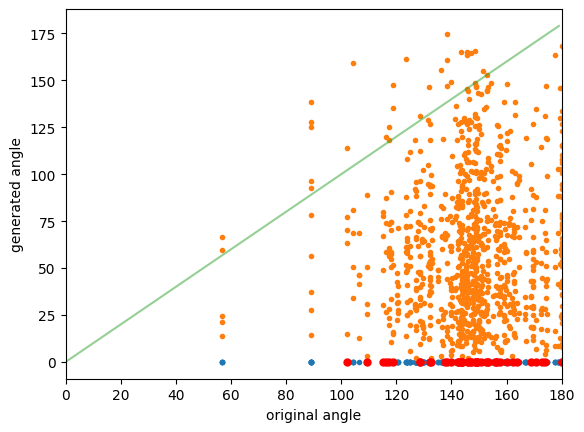

[0.027976453, 0.01978234, 0.01978234, 0.01978234, 0.0, 0.01978234, nan, 0.0, 0.027976453, nan, 0.0, nan, 0.0, 0.027976453, 0.027976453, 0.0, 0.027976453, nan, 0.0, 0.0, nan, nan, 0.0, 0.027976453, 0.0, nan, 0.01978234, nan, 0.0, 0.0, 0.027976453, 0.01978234, 0.027976453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01978234, nan, 0.01978234, nan, 0.0, 0.01978234, nan, nan, nan, 0.0, 0.0, 0.0, 0.01978234, 0.027976453, nan, 0.0, 0.0, 0.0, 0.027976453, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.027976453, nan, 0.0, 0.0, 0.01978234, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.01978234, 0.01978234, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.01978234, nan, 0.0, 0.01978234, 0.027976453, 0.0, nan, 0.0, 0.0, 0.01978234, 0.0, 0.0, 0.01978234, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.01978234, 0.0, nan, nan, nan, nan, 0.0, 0.0, nan, 0.01978234, 0.01978234, 0.027976453, 0.0, 0.0, nan, 0.0, 0.027976453, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.01978234, nan, 0.0, 0.01978234, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0

In [104]:
import matplotlib.pyplot as plt
import numpy as np
conditional_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20241211_151312-ihnudslq/files/generated_graph.pt")
abinitio_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20241212_130905-grs4mlrk/files/generated_graph.pt")
original_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20241211_151312-ihnudslq/files/original_graph.pt")
def angle_between_vectors(v1, v2):
    # ベクトルの内積を計算
    dot_product = np.dot(v1, v2)
    
    # ベクトルの大きさを計算
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    # コサイン値を計算
    cos_theta = dot_product / (norm_v1 * norm_v2)
    
    # アークコサインを使用して角度を計算（ラジアン）
    angle = np.arccos(cos_theta)

    # ラジアンを度に変換
    angle_degrees = np.degrees(angle)
    
    return angle_degrees

conditional_gen_angle_list, abinitio_gen_angle_list, ori_angle_list = [], [], []

for i in range(len(original_data)):
    generated_conditional_graph = conditional_data[i][-1]
    generated_abinitio_graph = abinitio_data[i][-1]
    original_graph = original_data[i]
    if generated_conditional_graph.x.shape[0] != 3:
        continue
    conditional_gen_pos = generated_conditional_graph.pos
    abinitio_gen_pos = generated_abinitio_graph.pos
    ori_pos = original_graph.pos
    conditional_gen_pos = conditional_gen_pos.cpu().numpy()
    abinitio_gen_pos = abinitio_gen_pos.cpu().numpy()
    ori_pos = ori_pos.cpu().numpy()
    conditional_genv1 = conditional_gen_pos[1] - conditional_gen_pos[0]
    conditional_genv2 = conditional_gen_pos[2] - conditional_gen_pos[0]
    abinitio_genv1 = abinitio_gen_pos[1] - abinitio_gen_pos[0]
    abinitio_genv2 = abinitio_gen_pos[2] - abinitio_gen_pos[0]
    oriv1 = ori_pos[1] - ori_pos[0]
    oriv2 = ori_pos[2] - ori_pos[0]
    conditional_angle_gen = angle_between_vectors(conditional_genv1,conditional_genv1)
    abinitio_angel_gen = angle_between_vectors(abinitio_genv1,abinitio_genv2)
    angle_ori = angle_between_vectors(oriv1,oriv2)
    conditional_gen_angle_list.append(conditional_angle_gen)
    abinitio_gen_angle_list.append(abinitio_angel_gen)
    ori_angle_list.append(angle_ori)

average_conditional_gen_angle_list = []
average_ori_angle_list = []
average_abinitio_gen_angle_list = []
for i in range(0,len(conditional_gen_angle_list),5):
    average_conditional_gen_angle_list.append(np.mean(conditional_gen_angle_list[i:i+5]))
    average_abinitio_gen_angle_list.append(np.mean(abinitio_gen_angle_list[i:i+5]))
    average_ori_angle_list.append(np.mean(ori_angle_list[i:i+5]))

x = np.arange(0,180,1)
y = np.arange(0,180,1)

fig, ax = plt.subplots()
ax.plot(ori_angle_list,conditional_gen_angle_list,'o',markersize=3)
ax.plot(ori_angle_list,abinitio_gen_angle_list,'o',markersize=3)
ax.plot(average_ori_angle_list,average_conditional_gen_angle_list,'o',markersize=5,color='red')
ax.plot(x,y,alpha=0.5)
ax.set_xlabel('original angle')
ax.set_ylabel('generated angle')
ax.set_xlim(0,180)
plt.show()

print(conditional_gen_angle_list)
print(abinitio_gen_angle_list)
print(average_conditional_gen_angle_list)




In [14]:
dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')
filterd_dataset = []
for data in dataset:
    if data.x.shape[0] == 3:
        filterd_dataset.append(data)
torch.save(filterd_dataset,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/filtered_dataset.pt')

/tmp/ipykernel_408849/3675216206.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/d

In [22]:
import torch
import os
dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')
for data in dataset:
    data_spectrum = data.spectrum
    for i in range(1,data_spectrum.shape[0]):
        for j in range(data_spectrum.shape[1]):
            data_spectrum[i,j] = 0
    data.spectrum = data_spectrum
print(dataset[0].spectrum)
torch.save(dataset,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/spectrum_to_only_exO_dataset.pt')

/tmp/ipykernel_408849/1775006079.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/d

tensor([[0.0018, 0.0031, 0.0049, 0.0078, 0.0118, 0.0175, 0.0253, 0.0356, 0.0489,
         0.0655, 0.0860, 0.1105, 0.1394, 0.1727, 0.2104, 0.2523, 0.2980, 0.3467,
         0.3977, 0.4496, 0.5013, 0.5511, 0.5978, 0.6400, 0.6769, 0.7078, 0.7323,
         0.7505, 0.7622, 0.7676, 0.7669, 0.7601, 0.7473, 0.7289, 0.7054, 0.6774,
         0.6458, 0.6112, 0.5746, 0.5366, 0.4977, 0.4583, 0.4189, 0.3799, 0.3419,
         0.3057, 0.2721, 0.2421, 0.2168, 0.1970, 0.1834, 0.1767, 0.1770, 0.1844,
         0.1985, 0.2190, 0.2452, 0.2767, 0.3129, 0.3534, 0.3976, 0.4453, 0.4961,
         0.5497, 0.6055, 0.6628, 0.7206, 0.7775, 0.8318, 0.8814, 0.9243, 0.9585,
         0.9827, 0.9964, 1.0000, 0.9951, 0.9843, 0.9705, 0.9569, 0.9460, 0.9396,
         0.9380, 0.9403, 0.9446, 0.9481, 0.9478, 0.9409, 0.9255, 0.9004, 0.8660,
         0.8235, 0.7751, 0.7236, 0.6720, 0.6230, 0.5788, 0.5408, 0.5099, 0.4861,
         0.4688, 0.4572, 0.4498, 0.4452, 0.4420, 0.4388, 0.4342, 0.4275, 0.4178,
         0.4050, 0.3891, 0.3

In [24]:
test = torch.zeros(3,1)
print(test)
test[0,0] = 1
print(test)

tensor([[0.],
        [0.],
        [0.]])
tensor([[1.],
        [0.],
        [0.]])


In [29]:
dataset_path = "/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/spectrum_to_only_exO_dataset.pt"
dataset = torch.load(dataset_path)
for data in dataset:
    exO = torch.zeros(data.x.shape[0],1)
    exO[0,0] = 1
    data.exO = exO
torch.save(dataset,dataset_path)
dataset = torch.load(dataset_path)
print(dataset[0].exO)


/tmp/ipykernel_408849/314838937.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(dataset_path)
/tmp/ipykernel_408849/314838937.py:8: FutureWarning: Y

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
import torch

b = torch.tensor([[1,2],[3,4]])
b = torch.cat((b,b),dim=1)
print(b)

tensor([[1, 2, 1, 2],
        [3, 4, 3, 4]])


In [35]:
import shutil
import os

copy_source_path = os.path.join('/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/eels_o/','mp-1244968_99')
castep_calc_path = os.path.join('/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/castep_task_elnes')
optados_calc_path = os.path.join('/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/optados_wo_sym')

copy_files = ['coreloss.cell','coreloss.param','singlepoint.param','singlepoint.cell']
for file in copy_files:
    shutil.copyfile(os.path.join(copy_source_path,file),os.path.join(castep_calc_path,file))
    shutil.copyfile(os.path.join(copy_source_path,file),os.path.join(optados_calc_path,file))
shutil.copyfile(os.path.join(copy_source_path,'coreloss.odi'),os.path.join(optados_calc_path,'coreloss.odi'))
shutil.copyfile(os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_10064_1/castep_task_elnes/coreloss.param"),os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/castep_task_elnes/",'coreloss.param'))
shutil.copyfile(os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_10064_1/castep_task_elnes/ELNES.param"),os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/castep_task_elnes/",'ELNES.param'))
shutil.copyfile(os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_10064_1/castep_task_elnes/jobscript.sh"),os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/castep_task_elnes/",'jobscript.sh'))
shutil.copyfile(os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_10064_1/optados_wo_sym/jobscript.sh"),os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/optados_wo_sym/",'jobscript.sh'))

'/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/test_mp_1244968_99/optados_wo_sym/jobscript.sh'

In [36]:
import numpy as np
data = np.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/dataset.npy",allow_pickle=True)
data[0][2]

[[[1, 0], array([0., 0., 0.])],
 [[0, 1], array([-0.00215081, -1.80224101, -0.00373794])],
 [[0, 1], array([ 0.85066018,  0.60074676, -1.47090851])],
 [[0, 1], array([-1.69917057,  0.60074676, -0.00373794])],
 [[0, 1], array([0.85066018, 0.60074676, 1.47838262])]]

In [70]:
import yaml
import torch
import os
from diffusion_x_h import E3DiffusionProcess
import matplotlib.pyplot as plt

with open('parameters.yaml','r') as file:
    params = yaml.safe_load(file)

noise_precision = params['noise_precision']
num_diffusion_timestep = params['num_diffusion_timestep']
noise_schedule = params['noise_schedule']
power = params['noise_schedule_power']
diffusion_process = E3DiffusionProcess(s=noise_precision,power=power,num_diffusion_timestep=num_diffusion_timestep,noise_schedule='learned')



/mnt/homenfsxx/rokubo/data/diffusion_model/SNR.py:14: FutureWarning: `nn.init.kaiming_uniform` is now deprecated in favor of `nn.init.kaiming_uniform_`.
  self.weight = torch.nn.init.kaiming_uniform(self.weight, a=math.sqrt(5))


In [73]:

model_path = 'egnn_202411281617.pth'
model_states = torch.load(os.path.join('/mnt/homenfsxx/rokubo/data/diffusion_model/model_state/model_to_predict_epsilon',model_path))
print(model_states['GammaNetwork'].keys())
diffusion_process.gamma.load_state_dict(model_states['GammaNetwork'])

t = diffusion_process.t
target = torch.sqrt(torch.sigmoid(-diffusion_process.gamma(t)))

fig, ax = plt.subplots()
ax.plot(t.detach().numpy(),target.detach().numpy())
ax.set_xlabel('t')
ax.set_ylabel('target')
plt.show()



odict_keys(['gamma_0', 'gamma_1', 'l1.weight', 'l2.weight', 'l3.weight'])


/tmp/ipykernel_408849/3338193277.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_states = torch.load(os.path.join('/mnt/homenfsxx/rokubo/data/diffusion_model/model

RuntimeError: Error(s) in loading state_dict for GammaNetwork:
	Unexpected key(s) in state_dict: "gamma_0". 

In [ ]:
import torch_geometric.datasets as datasets

dataset = datasets.QM9(root='/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/QM9')
dataset_a = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt")
print(dataset[0])
print(dataset[0].x)
print(dataset[0].y)
print(dataset[0].pos)
dataset = list(dataset)
print(dataset[0])

/tmp/ipykernel_408849/2944604402.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_a = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], idx=[1], name='gdb_1', z=[5])
tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]])
tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,  3.0000e-04],
        [-5.4080e-01,  1.4475e+00, -8.7660e-01],
        [-5.2380e-01,  1.4379e+00,  9.0640e-01]])
Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], idx=[1], name='gdb_1', z=[5])


In [90]:
eels_o_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/eels_o"
dirs = [d for d in os.listdir(eels_o_path) if os.path.isdir(os.path.join(eels_o_path,d))]
dirs = [d for d in dirs if os.path.exists(os.path.join(eels_o_path,d,'singlepoint.castep'))]

keyword_string = "Number of symmetry operations"

num_to_calculate = 0

for d in dirs:
    with open(os.path.join(eels_o_path,d,'singlepoint.castep'),'r') as f:
        lines = f.readlines()
        for line in lines:
            if keyword_string in line:
                num_of_sym_operations = int(line.strip().split()[-1])
                if num_of_sym_operations != 1:
                    os.makedirs(os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym",d),exist_ok=True)
                    num_to_calculate += 1
                    break
print(num_to_calculate)

728


In [87]:
print(len(os.listdir("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym")))

728


In [92]:
import shutil
import os

jobscript_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym/jobscript.sh"
optados_wo_sym_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym"

dirs = [d for d in os.listdir(optados_wo_sym_path) if os.path.isdir(os.path.join(optados_wo_sym_path,d))]
for d in dirs:
    copy_dist_path = os.path.join(optados_wo_sym_path,d)
    shutil.copyfile(jobscript_path,os.path.join(copy_dist_path,'jobscript.sh'))


In [94]:
import shutil
import os

jobscript_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym/jobscript.sh"
optados_wo_sym_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym"

dirs = [d for d in os.listdir(optados_wo_sym_path) if os.path.isdir(os.path.join(optados_wo_sym_path,d))]

copy_files = ['coreloss.cell','coreloss.param','singlepoint.cell','singlepoint.param','coreloss.odi']
for d in dirs:
    if os.path.exists(os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/calculation_2024_11",d)):
        copy_source_path = os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/calculation_2024_11",d)
    else:
        copy_source_path = os.path.join("/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/eels_o",d)
    for file in copy_files:
        shutil.copyfile(os.path.join(copy_source_path,file),os.path.join(optados_wo_sym_path,d,file))


In [96]:
import shutil
import os

jobscript_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym/jobscript.sh"
optados_wo_sym_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym"

dirs = [d for d in os.listdir(optados_wo_sym_path) if os.path.isdir(os.path.join(optados_wo_sym_path,d))]
for d in dirs:
    coreloss_path = os.path.join(optados_wo_sym_path,d,'coreloss.cell')
    singlepoint_path = os.path.join(optados_wo_sym_path,d,'singlepoint.cell')
    with open(coreloss_path,'r') as f:
        lines = f.readlines()
        new_lines = []
        for line in lines:
            if 'symmetry' not in line:
                new_lines.append(line)
    with open(coreloss_path,'w') as f:
        f.writelines(new_lines)
    with open(singlepoint_path,'r') as f:
        lines = f.readlines()
        new_lines = []
        for line in lines:
            if 'symmetry' not in line:
                new_lines.append(line)
    with open(singlepoint_path,'w') as f:
        f.writelines(new_lines)


In [102]:
import shutil
import os

jobscript_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym/jobscript.sh"
optados_wo_sym_path = "/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym"

dirs = [d for d in os.listdir(optados_wo_sym_path) if os.path.isdir(os.path.join(optados_wo_sym_path,d))]
dirs = [d for d in dirs if os.path.exists(os.path.join(optados_wo_sym_path,d,"coreloss.cell"))]
print(len(dirs))

728


In [12]:
import torch
import os
import shutil
import data_preparation
from tqdm import tqdm

dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/spectrum_to_only_exO_dataset.pt")

for i in tqdm(range(len(dataset))):
    data = dataset[i]
    check = '/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym'
    if os.path.exists(os.path.join(check,data.id)):
        spectrum_path = os.path.join(check,data.id,'coreloss_core_edge.dat')
        spectrum = data_preparation.fitted_intensity(spectrum_path)
        spectrum = torch.from_numpy(spectrum)
        #for i in range(data.spectrum.shape[0]):
            #data.spectrum[i] = spectrum
        data.spectrum[0] = spectrum



/tmp/ipykernel_5067/3102893605.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/spe

In [10]:
import torch

dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')
data_only_Si = []
for data in dataset:
    a = 0
    num_atoms = data.x.shape[0]
    for i in range(1,num_atoms):
        if torch.equal(data.x[0],data.x[i]):
            a = 1
        else:
            pass
    if a == 0:
        data_only_Si.append(data)
torch.save(data_only_Si,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset_only_Si.pt')

/tmp/ipykernel_6402/4039851157.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dat

In [12]:
import torch

dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset_only_Si.pt')
data_only_CN2 = []
for data in dataset:
    if data.x.shape[0] == 3:
        data_only_CN2.append(data)
torch.save(data_only_CN2,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset_only_CN2_Si.pt')

/tmp/ipykernel_6402/4286686744.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dat

In [13]:
dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset_only_CN2_Si.pt')
print(len(dataset))
print(torch.equal(dataset[0].x[0],dataset[0].x[1]))

/tmp/ipykernel_6402/2341763106.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dat

1969
False


In [14]:
def write_xyz_from_only_pos(save_path,original_pos,generated_pos,comment=None):
    num_atom = original_pos.shape[0]
    with open(save_path,'w') as f:
        f.write(str(num_atom*2)+'\n')
        f.write(f'{comment}\n')
        f.write(f'F {original_pos[0][0].item()} {original_pos[0][1].item()} {original_pos[0][2].item()}\n')
        for i in range(1,num_atom):
            f.write(f'Al {original_pos[i][0].item()} {original_pos[i][1].item()} {original_pos[i][2].item()}\n')
        f.write(f'O {generated_pos[0][0].item()} {generated_pos[0][1].item()} {generated_pos[0][2].item()}\n')
        for i in range(1,num_atom):
            f.write(f'Si {generated_pos[i][0].item()} {generated_pos[i][1].item()} {generated_pos[i][2].item()}\n')

In [31]:
import shutil
import os
import numpy as np

model_name = str(input('model_name:'))
assert os.path.exists('/mnt/homenfsxx/rokubo/data/diffusion_model/conditional_gen_by_dataset_only_CN2_including_180_' + model_name + '.npz')
os.makedirs(os.path.join('/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/',model_name),exist_ok=True)
shutil.move('/mnt/homenfsxx/rokubo/data/diffusion_model/conditional_gen_by_dataset_only_CN2_including_180_' + model_name + '.npz','/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/'+model_name+'/conditional_gen_by_dataset_only_CN2_including_180_' + model_name + '.npz')
"""
dataset = np.load('/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/'+model_name+'/conditional_gen_by_dataset_only_CN2_including_180_' + model_name + '.npz',allow_pickle=True)
original_data = dataset["original_coords_list"]
generated_data = dataset["generated_coords_list"]
random_list = range(len(original_data))
random_list = np.random.choice(random_list,10,replace=False)
j = 1
for i in random_list:
    original_pos = torch.tensor(original_data[i])
    generated_pos = torch.tensor(generated_data[i][-1])
    save_path = os.path.join('/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/',model_name,'result'+str(j) + '.xyz')
    write_xyz_from_only_pos(save_path,original_pos,generated_pos)
    j += 1
"""



'\ndataset = np.load(\'/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/\'+model_name+\'/conditional_gen_by_dataset_only_CN2_including_180_\' + model_name + \'.npz\',allow_pickle=True)\noriginal_data = dataset["original_coords_list"]\ngenerated_data = dataset["generated_coords_list"]\nrandom_list = range(len(original_data))\nrandom_list = np.random.choice(random_list,10,replace=False)\nj = 1\nfor i in random_list:\n    original_pos = torch.tensor(original_data[i])\n    generated_pos = torch.tensor(generated_data[i][-1])\n    save_path = os.path.join(\'/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/\',model_name,\'result\'+str(j) + \'.xyz\')\n    write_xyz_from_only_pos(save_path,original_pos,generated_pos)\n    j += 1\n'

In [32]:
dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/filtered_dataset_only_Si.pt")
print(dataset[0].exO)

/tmp/ipykernel_6402/1725776173.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/fil

tensor([[1.],
        [0.],
        [0.]])


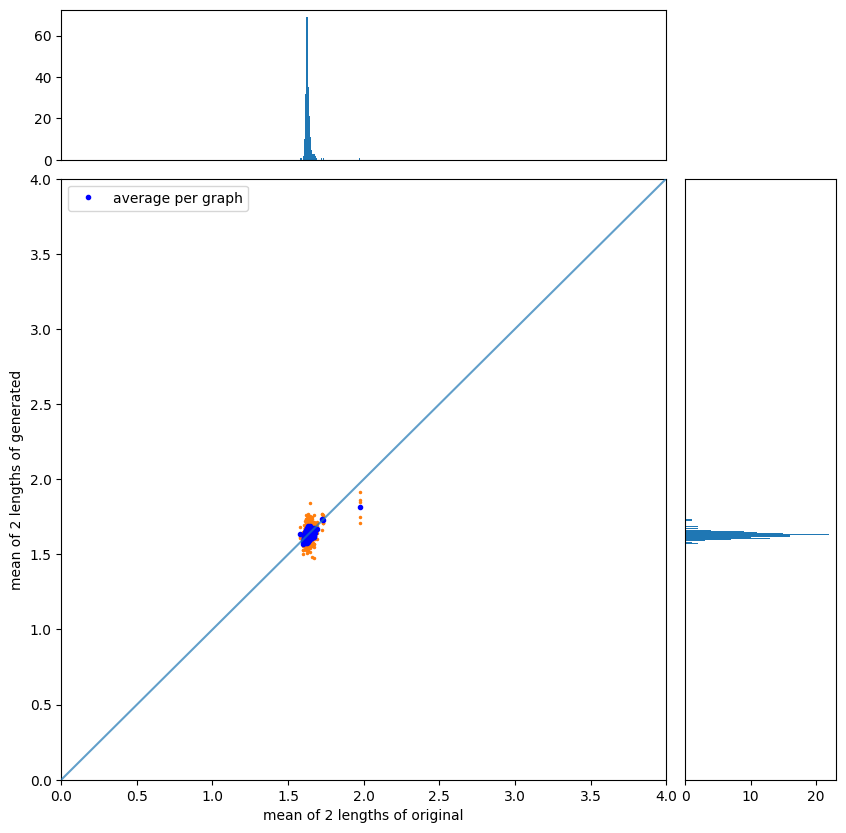

In [48]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import numpy as np
import torch
import time

def calculate_bond_length_for_CN2(coords_tensor):
    v1 = coords_tensor[1] - coords_tensor[0]
    v2 = coords_tensor[2] - coords_tensor[0]
    return torch.norm(v1).item(),torch.norm(v2).item()

gs = GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1])
fig = plt.figure(figsize=(10,10))
ax_scatter = fig.add_subplot(gs[1,0])


data = np.load('/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/egnn_202412251650/conditional_gen_by_dataset_only_CN2_including_180_egnn_202412251650.npz')
original_coords = data['original_coords_list']
generated_coords = data['generated_coords_list']
how_many_gen = 5

theta_length, phi_length = [],[]
std_phi_per_graph = []
average_length_of_original, average_length_of_generated = [],[]



for i in range(len(original_coords)):
    norm1, norm2 = calculate_bond_length_for_CN2(torch.tensor(original_coords[i]))
    theta_length.append((norm1+norm2)/2)
    norm1, norm2 = calculate_bond_length_for_CN2(torch.tensor(generated_coords[i][-1]))
    phi_length.append((norm1+norm2)/2)
for i in list(range(0,len(theta_length),how_many_gen)):
    average_length_of_original.append(np.mean(theta_length[i:i+how_many_gen]))
    average_length_of_generated.append(np.mean(phi_length[i:i+how_many_gen]))
    std_phi_per_graph.append(np.std(phi_length[i:i+how_many_gen]))

hist_theta, bins_theta = np.histogram(average_length_of_original,bins=50)
hist_phi, bins_phi = np.histogram(average_length_of_generated,bins=50)
bin_centers_theta = (bins_theta[:-1] + bins_theta[1:]) / 2
bin_centers_phi = (bins_phi[:-1] + bins_phi[1:]) / 2

ax_scatter.plot([0,5],[0,5],zorder=3,alpha=0.7)
ax_scatter.plot(theta_length,phi_length,'o',markersize=1.5)
ax_scatter.plot(average_length_of_original,average_length_of_generated,'o',markersize=3,label='average per graph',color='blue')
#ax_scatter.errorbar(average_length_of_original,average_length_of_generated,yerr=std_phi_per_graph,fmt='none',ecolor='red',capsize=3,capthick=1,alpha=0.5)
ax_scatter.set_xlabel('mean of 2 lengths of original')
ax_scatter.set_ylabel('mean of 2 lengths of generated')
ax_scatter.set_xlim(0.0,4.0)
ax_scatter.set_ylim(0.0,4.0)
ax_scatter.legend()



ax_hist_theta = fig.add_subplot(gs[0,0],sharex=ax_scatter)
ax_hist_phi = fig.add_subplot(gs[1,1],sharey=ax_scatter)
ax_text = fig.add_subplot(gs[0,1])
ax_text.axis('off')
ax_hist_theta.hist(average_length_of_original,bins=50,orientation='vertical')
ax_hist_phi.hist(average_length_of_generated,bins=50,orientation='horizontal')
ax_hist_theta.get_xaxis().set_visible(False)
ax_hist_phi.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0.05,hspace=0.05)
plt.show()
time.sleep(1)
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


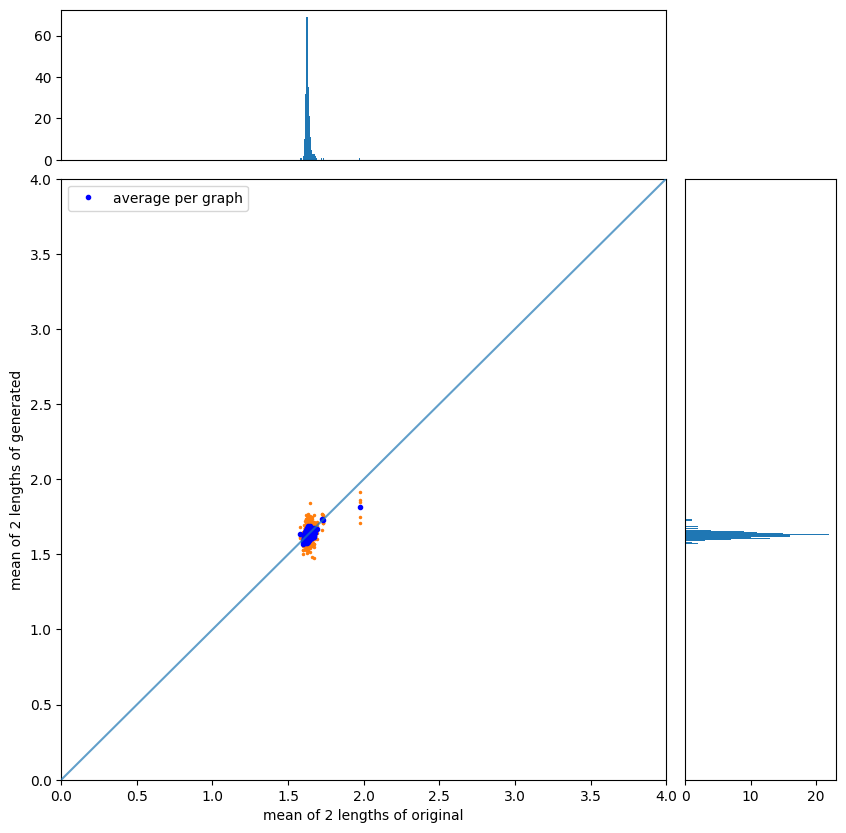

In [54]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import torch
import matplotlib.animation as animation
import imageio

def calculate_bond_length_for_CN2(coords_tensor):
    v1 = coords_tensor[1] - coords_tensor[0]
    v2 = coords_tensor[2] - coords_tensor[0]
    return torch.norm(v1).item(), torch.norm(v2).item()

# データの読み込み
data = np.load('/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/egnn_202412251650/conditional_gen_by_dataset_only_CN2_including_180_egnn_202412251650.npz')
original_coords = data['original_coords_list']
generated_coords = data['generated_coords_list']
how_many_gen = 5

# 図と軸の設定
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2, height_ratios=[1, 4], width_ratios=[4, 1])
ax_scatter = fig.add_subplot(gs[1, 0])
ax_hist_theta = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_hist_phi = fig.add_subplot(gs[1, 1], sharey=ax_scatter)
ax_text = fig.add_subplot(gs[0, 1])
ax_text.axis('off')

# アニメーションの更新関数
def update(t):
    ax_scatter.clear()
    ax_hist_theta.clear()
    ax_hist_phi.clear()
    
    theta_length, phi_length = [], []
    std_phi_per_graph = []
    average_length_of_original, average_length_of_generated = [], []

    for i in range(len(original_coords)):
        norm1, norm2 = calculate_bond_length_for_CN2(torch.tensor(original_coords[i]))
        theta_length.append((norm1 + norm2) / 2)
        norm1, norm2 = calculate_bond_length_for_CN2(torch.tensor(generated_coords[i][t]))
        phi_length.append((norm1 + norm2) / 2)
    
    for i in list(range(0, len(theta_length), how_many_gen)):
        average_length_of_original.append(np.mean(theta_length[i:i + how_many_gen]))
        average_length_of_generated.append(np.mean(phi_length[i:i + how_many_gen]))
        std_phi_per_graph.append(np.std(phi_length[i:i + how_many_gen]))

    hist_theta, bins_theta = np.histogram(average_length_of_original, bins=50)
    hist_phi, bins_phi = np.histogram(average_length_of_generated, bins=50)
    bin_centers_theta = (bins_theta[:-1] + bins_theta[1:]) / 2
    bin_centers_phi = (bins_phi[:-1] + bins_phi[1:]) / 2

    ax_scatter.plot([0, 5], [0, 5], zorder=3, alpha=0.7)
    ax_scatter.plot(theta_length, phi_length, 'o', markersize=1.5)
    ax_scatter.plot(average_length_of_original, average_length_of_generated, 'o', markersize=3, label='average per graph', color='blue')
    ax_scatter.set_xlabel('mean of 2 lengths of original')
    ax_scatter.set_ylabel('mean of 2 lengths of generated')
    ax_scatter.set_xlim(0.0, 4.0)
    ax_scatter.set_ylim(0.0, 4.0)
    ax_scatter.legend()

    ax_hist_theta.hist(average_length_of_original, bins=50, orientation='vertical')
    ax_hist_phi.hist(average_length_of_generated, bins=50, orientation='horizontal')
    ax_hist_theta.get_xaxis().set_visible(False)
    ax_hist_phi.get_yaxis().set_visible(False)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

# アニメーションの作成
ani = animation.FuncAnimation(fig, update, frames=range(-11, 0), repeat=False)

# GIFとして保存
ani.save('bond_length_animation.gif', writer='imagemagick')

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


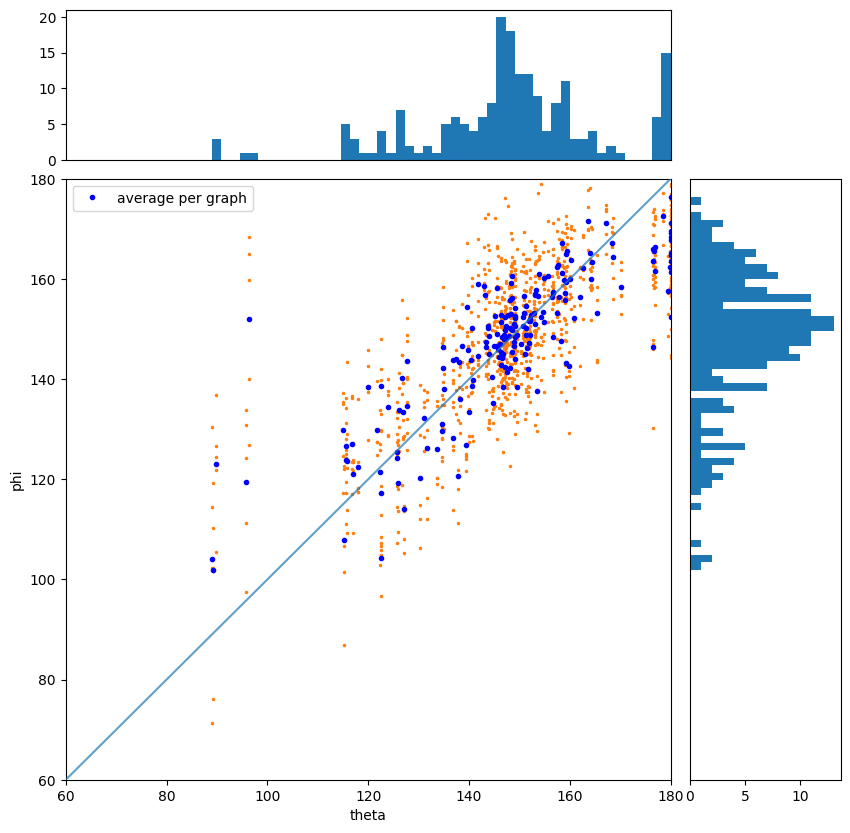

In [53]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import torch
import matplotlib.animation as animation
import imageio

def calculate_bond_length_for_CN2(coords_tensor):
    v1 = coords_tensor[1] - coords_tensor[0]
    v2 = coords_tensor[2] - coords_tensor[0]
    return torch.norm(v1).item(), torch.norm(v2).item()

def calculate_angle_for_CN2(coords_tensor):
    v1 = coords_tensor[1] - coords_tensor[0]
    v2 = coords_tensor[2] - coords_tensor[0]
    cos = torch.dot(v1,v2) / (torch.norm(v1) * torch.norm(v2))
    return np.degrees(torch.acos(cos).item())

# データの読み込み
data = np.load('/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/egnn_202412251650/conditional_gen_by_dataset_only_CN2_including_180_egnn_202412251650.npz')
original_coords = data['original_coords_list']
generated_coords = data['generated_coords_list']
how_many_gen = 5

# 図と軸の設定
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2, height_ratios=[1, 4], width_ratios=[4, 1])
ax_scatter = fig.add_subplot(gs[1, 0])
ax_hist_theta = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_hist_phi = fig.add_subplot(gs[1, 1], sharey=ax_scatter)
ax_text = fig.add_subplot(gs[0, 1])
ax_text.axis('off')

# アニメーションの更新関数
def update(t):
    ax_scatter.clear()
    ax_hist_theta.clear()
    ax_hist_phi.clear()
    
    theta_list, phi_list = [],[]
    for i in range(len(original_coords)):
        theta_list.append(calculate_angle_for_CN2(torch.tensor(original_coords[i])))
        phi_list.append(calculate_angle_for_CN2(torch.tensor(generated_coords[i][t])))
    
    average_theta_per_graph =[]
    average_phi_per_graph =[]
    std_phi_per_graph = []

    how_many_gen = 5

    for i in list(range(0,len(theta_list),how_many_gen)):
        average_theta_per_graph.append(np.mean(theta_list[i:i+how_many_gen]))
        average_phi_per_graph.append(np.mean(phi_list[i:i+how_many_gen]))
        std_phi_per_graph.append(np.std(phi_list[i:i+how_many_gen]))

    hist_theta, bins_theta = np.histogram(average_length_of_original, bins=50)
    hist_phi, bins_phi = np.histogram(average_length_of_generated, bins=50)
    bin_centers_theta = (bins_theta[:-1] + bins_theta[1:]) / 2
    bin_centers_phi = (bins_phi[:-1] + bins_phi[1:]) / 2

    ax_scatter.plot([0,180],[0,180],zorder=3,alpha=0.7)
    ax_scatter.plot(theta_list,phi_list,'o',markersize=1.5)
    #ax_scatter.errorbar(average_theta_per_graph,average_phi_per_graph,yerr=std_phi_per_graph,fmt='none',ecolor='red',capsize=3,capthick=1,alpha=0.5)
    ax_scatter.plot(average_theta_per_graph,average_phi_per_graph,'o',markersize=3,color='blue',label='average per graph')
    ax_scatter.set_xlabel('theta')
    ax_scatter.set_ylabel('phi')
    ax_scatter.set_xlim(60,180)
    ax_scatter.set_ylim(60,180)
    ax_scatter.legend()

    ax_hist_theta.hist(average_theta_per_graph, bins=50, orientation='vertical')
    ax_hist_phi.hist(average_phi_per_graph, bins=50, orientation='horizontal')
    ax_hist_theta.get_xaxis().set_visible(False)
    ax_hist_phi.get_yaxis().set_visible(False)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

# アニメーションの作成
ani = animation.FuncAnimation(fig, update, frames=range(-11, 0), repeat=False)

# GIFとして保存
ani.save('angle_animation.gif', writer='imagemagick')

plt.show()

In [56]:
import torch
import os

dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset.pt')
dataset_except_CN0 = []
for data in dataset:
    if data.x.shape[0] != 1:
        dataset_except_CN0.append(data)
print(len(dataset_except_CN0))
torch.save(dataset_except_CN0,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset_except_CN0.pt')

/tmp/ipykernel_6402/1791482386.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dat

2060


In [58]:
#正しく計算されたdatファイルのみをまとめたディレクトリを作成
import os, shutil

dist_path = '/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/dat_files'
without_sym_path = '/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/optados_without_sym'
cal_2024_11_path = '/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/calculation_2024_11'
Si_O_path = '/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/eels_o'

dirs = [d for d in os.listdir(Si_O_path) if os.path.isdir(os.path.join(Si_O_path, d))]
dirs = [d for d in dirs if os.path.exists(os.path.join(Si_O_path,d,'coreloss.cell'))]

for d in dirs:
    if os.path.exists(os.path.join(without_sym_path,d)):
        source_path = os.path.join(without_sym_path,d)
    elif os.path.exists(os.path.join(cal_2024_11_path,d)):
        source_path = os.path.join(cal_2024_11_path,d)
    elif os.path.exists(os.path.join(Si_O_path,d)):
        source_path = os.path.join(Si_O_path,d)
    else:
        print(d)
        print('not found')
        continue
    if os.path.exists(os.path.join(dist_path,d)):
        continue
    os.makedirs(os.path.join(dist_path,d),exist_ok=True)
    shutil.copy(os.path.join(source_path,'coreloss_core_edge.dat'),os.path.join(dist_path,d,'coreloss_core_edge.dat'))
    shutil.copy(os.path.join(source_path,'coreloss.cell'),os.path.join(dist_path,d,'coreloss.cell'))


In [5]:
import numpy as np

def degrees_to_radians(degrees):
    return degrees * np.pi / 180

def lattice_constants_to_matrix(a, b, c, alpha, beta, gamma):
    # 角度をラジアンに変換
    alpha = degrees_to_radians(alpha)
    beta = degrees_to_radians(beta)
    gamma = degrees_to_radians(gamma)
    
    # 格子定数行列の計算
    lattice_matrix = np.zeros((3, 3))
    lattice_matrix[0, 0] = a
    lattice_matrix[0, 1] = b * np.cos(gamma)
    lattice_matrix[0, 2] = c * np.cos(beta)
    lattice_matrix[1, 1] = b * np.sin(gamma)
    lattice_matrix[1, 2] = c * (np.cos(alpha) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma)
    lattice_matrix[2, 2] = c * np.sqrt(1 - np.cos(beta)**2 - ((np.cos(alpha) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma))**2)
    
    return lattice_matrix

def fractional_to_cartesian(lattice_matrix, fractional_coords):
    """
    格子定数と相対座標から絶対座標を計算する関数

    Parameters:
    lattice_constants (numpy.ndarray): 3x3の格子定数行列
    fractional_coords (numpy.ndarray): Nx3の相対座標行列

    Returns:
    numpy.ndarray: Nx3の絶対座標行列
    """


    # 相対座標を絶対座標に変換
    cartesian_coords = np.dot(fractional_coords, lattice_matrix)

    return cartesian_coords

In [ ]:
import torch
from torch_geometric.data import Data
import numpy as np

def degrees_to_radians(degrees):
    return degrees * np.pi / 180

def lattice_constants_to_matrix(a, b, c, alpha, beta, gamma):
    # 角度をラジアンに変換
    alpha = degrees_to_radians(alpha)
    beta = degrees_to_radians(beta)
    gamma = degrees_to_radians(gamma)
    
    # 格子定数行列の計算
    lattice_matrix = np.zeros((3, 3))
    lattice_matrix[0, 0] = a
    lattice_matrix[0, 1] = b * np.cos(gamma)
    lattice_matrix[0, 2] = c * np.cos(beta)
    lattice_matrix[1, 1] = b * np.sin(gamma)
    lattice_matrix[1, 2] = c * (np.cos(alpha) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma)
    lattice_matrix[2, 2] = c * np.sqrt(1 - np.cos(beta)**2 - ((np.cos(alpha) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma))**2)
    
    return lattice_matrix

def fractional_to_cartesian(lattice_matrix, fractional_coords):
    """
    格子定数と相対座標から絶対座標を計算する関数

    Parameters:
    lattice_constants (numpy.ndarray): 3x3の格子定数行列
    fractional_coords (numpy.ndarray): Nx3の相対座標行列

    Returns:
    numpy.ndarray: Nx3の絶対座標行列
    """


    # 相対座標を絶対座標に変換
    cartesian_coords = np.dot(fractional_coords, lattice_matrix)

    return cartesian_coords


def cell_to_atom_list(cell_path):
    with open(cell_path) as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    a, b, c = [float(x) for x in lines[1].split()]
    alpha, beta, gamma = [float(x) for x in lines[2].split()]
    lattice_matrix = lattice_constants_to_matrix(a, b, c, alpha, beta, gamma)
    first_atom_index = lines.index('%BLOCK POSITIONS_FRAC') + 1
    last_atom_index = lines.index('%ENDBLOCK POSITIONS_FRAC') - 1
    atom_list = []
    for i in range(first_atom_index, last_atom_index + 1):
        lines[i] = lines[i].split()
        fractional_coords = np.array([float(x) for x in lines[i][1:]])
        cartesian_coords = fractional_to_cartesian(lattice_matrix, fractional_coords)
        atom_list.append([lines[i][0], cartesian_coords])

    # 周囲のセルの原子を追加
    neighbor_shifts = [-1, 0, 1]
    extended_atom_list = []
    for atom in atom_list:
        for dx in neighbor_shifts:
            for dy in neighbor_shifts:
                for dz in neighbor_shifts:
                    shift = np.array([dx, dy, dz])
                    shifted_coords = atom[1] + np.dot(shift, lattice_matrix)
                    if (dx, dy, dz) != (0, 0, 0) and atom[0] == 'O:ex':
                        extended_atom_list.append(['O', shifted_coords])
                    else:
                        extended_atom_list.append([atom[0], shifted_coords])

    return extended_atom_list

def atom_list_to_graph(atom_list,cutoff=3.0):
    for i in range(len(atom_list)):
        if atom_list[i][0] == 'Si':
            atom_list[i][0] = np.array([0,1])
        elif atom_list[i][0] == 'O':
            atom_list[i][0] = np.array([1,0])
        elif atom_list[i][0] == 'O:ex':
            atom_list[i][0] = np.array([1,0])
            exO_index = i
        else:
            print('error')
            return
    exO_coords = torch.tensor(atom_list[exO_index][1],dtype=torch.float32)
    atom_list_exO = []
    for node in atom_list:
        node[0] = torch.tensor(node[0],dtype=torch.long)
        node[1] = torch.tensor(node[1],dtype=torch.float32) - exO_coords
        assert node[1].dim() == 1
    cutoffed_atom_list = []
    for node in atom_list:
        if torch.norm(node[1]) < cutoff:
            cutoffed_atom_list.append(node)
    num_of_atoms = len(cutoffed_atom_list)
    for i in range(len(cutoffed_atom_list)):
        if torch.norm(cutoffed_atom_list[i][1]) == 0:
            exO_index = i
    edge_index = []
    for i in range(num_of_atoms):
        for j in range(num_of_atoms):
            if i != j:
                edge_index.append([i,j])
    edge_index = torch.tensor(edge_index,dtype=torch.long).t().contiguous()
    sorted_atom_list = []
    sorted_atom_list.append(cutoffed_atom_list[exO_index])
    for i in range(num_of_atoms):
        if i != exO_index:
            sorted_atom_list.append(cutoffed_atom_list[i])
    graph = Data(x=torch.stack([node[0] for node in sorted_atom_list]),pos=torch.stack([node[1] for node in sorted_atom_list]),edge_index=edge_index)
    assert graph.x.dim() == 2
    assert graph.pos.dim() == 2
    return graph

import os
import torch
import data_preparation
from torch_geometric.data import Data

source_path = '/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/dat_files'
dirs = [d for d in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, d))]
dirs = [d for d in dirs if os.path.exists(os.path.join(source_path,d,'coreloss.cell'))]

dataset = []
for d in dirs:
    atom_list = cell_to_atom_list(os.path.join(source_path,d,'coreloss.cell'))
    graph = atom_list_to_graph(atom_list,cutoff=5.0)
    spectrum = data_preparation.fitted_intensity(os.path.join(source_path,d,'coreloss_core_edge.dat'))
    num_of_atoms = graph.x.shape[0]
    spectrum_tensor = torch.zeros(num_of_atoms,spectrum.shape[0])
    spectrum_tensor[0] = torch.tensor(spectrum,dtype=torch.float32)
    exO_tensor = torch.zeros(num_of_atoms,1)
    exO_tensor[0] = 1
    graph.spectrum = spectrum_tensor
    graph.exO = exO_tensor
    graph.id = d
    dataset.append(graph)
print(len(dataset))
torch.save(dataset,'/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/dataset.pt')
    

2067


2067


In [91]:
import numpy as np


def kabsch_numpy(P, Q):
    """
    Computes the optimal rotation and translation to align two sets of points (P -> Q),
    and their RMSD.

    :param P: A Nx3 matrix of points
    :param Q: A Nx3 matrix of points
    :return: A tuple containing the optimal rotation matrix, the optimal
             translation vector, and the RMSD.
    """
    assert P.shape == Q.shape, "Matrix dimensions must match"

    # Compute centroids
    centroid_P = np.mean(P, axis=0)
    centroid_Q = np.mean(Q, axis=0)

    # Optimal translation
    t = centroid_Q - centroid_P

    # Center the points
    p = P - centroid_P
    q = Q - centroid_Q

    # Compute the covariance matrix
    H = np.dot(p.T, q)

    # SVD
    U, S, Vt = np.linalg.svd(H)

    # Validate right-handed coordinate system
    if np.linalg.det(np.dot(Vt.T, U.T)) < 0.0:
        Vt[-1, :] *= -1.0

    # Optimal rotation
    R = np.dot(Vt.T, U.T)

    # RMSD
    rmsd = np.sqrt(np.sum(np.square(np.dot(p, R.T) - q)) / P.shape[0])

    return R, t, rmsd

In [123]:
import torch
import os
data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250108_112624-re4lvp84/files/rmsd.pt")
from evaluate_rmsd_for_pos_generate import kabsch_torch

"""print(data[-1])
R, t, rmsd = kabsch_torch(data[-1][2].pos.to('cuda'),data[-1][3].pos.to('cuda'))
print(rmsd)
R, t, rmsd = kabsch_numpy(data[-1][2].pos.cpu().numpy(),data[-1][3].pos.cpu().numpy())
print(rmsd)"""

num = 0
for i in range(len(data)):
    check = data[-i]
    R_numpy, t_numpy, rmsd_numpy = kabsch_numpy(check[2].pos.cpu().numpy(),check[3].pos.cpu().numpy())
    R_torch, t_torch, rmsd_torch = kabsch_torch(check[2].pos.to('cuda'),check[3].pos.to('cuda'))
    if rmsd_torch.item() - rmsd_numpy > 1:
        print(check[0])
        print(f'rmsd_torch : {rmsd_torch.item()}')
        print(f'rmsd_numpy : {rmsd_numpy}')
        
        print(torch.matmul((check[2].pos.to('cuda')+t_torch.to('cuda')),R_torch.transpose(0,1).to('cuda')))
        print(check[3].pos)

        print(np.dot((check[2].pos.cpu().numpy()+t_numpy),R_numpy.T))
        exit
        num += 1
print(f'{num}/{len(data)} is wrong')


/tmp/ipykernel_6402/626312460.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250108_112624-re4

mp-600004_8
rmsd_torch : 2.666628122329712
rmsd_numpy : 0.16526316488894113
tensor([[ 6.3429e-06,  1.0284e-04, -1.0579e-05],
        [ 1.2950e-01,  1.9386e-01, -1.5968e+00],
        [-1.2949e-01, -1.9365e-01,  1.5968e+00]], device='cuda:0')
tensor([[-0.1325, -0.1747, -0.0219],
        [ 0.2012,  0.2891,  1.6746],
        [-0.0687, -0.1146, -1.6525]], device='cuda:0')
[[ 1.0128968e-04 -1.3441837e-05  1.6989252e-05]
 [ 1.2959790e-01  1.9374093e-01  1.5968013e+00]
 [-1.2939531e-01 -1.9376782e-01 -1.5967672e+00]]
mp-1204070_14
rmsd_torch : 2.6369364261627197
rmsd_numpy : 0.15216785449020176
tensor([[-7.8620e-02,  3.4502e-01, -4.3887e-02],
        [ 1.6490e-02, -3.4549e-01, -1.5290e+00],
        [ 6.2089e-02,  1.7971e-04,  1.5728e+00]], device='cuda:0')
tensor([[-0.0437,  0.1957,  0.0039],
        [-0.0020, -0.2879,  1.6736],
        [ 0.0457,  0.0925, -1.6776]], device='cuda:0')
[[-7.8555502e-02  3.4503150e-01  4.3889135e-02]
 [ 1.6555347e-02 -3.4547496e-01  1.5290215e+00]
 [ 6.2153555e-02

In [14]:
import torch
import random
def make_xyz_ignore_atom_type(save_path,original_graph,generated_graph,comment=None):
    num_atom = original_graph.pos.shape[0]
    with open(save_path,'w') as f:
        f.write(str(num_atom*2)+'\n')
        f.write(f'{comment}\n')
        for i in range(num_atom):
            f.write(f'F {original_graph.pos[i][0].item()} {original_graph.pos[i][1].item()} {original_graph.pos[i][2].item()}\n')
        for i in range(num_atom):
            f.write(f'O {generated_graph.pos[i][0].item()} {generated_graph.pos[i][1].item()} {generated_graph.pos[i][2].item()}\n')

dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250114_162127-6n1j0cwg/files/generated_graph.pt")
original_dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250114_162127-6n1j0cwg/files/original_graph.pt")
random_list = range(len(dataset))
for i in range(20):
    num = random.choice(random_list)
    generated_graph = dataset[num][-1]
    original_graph = original_dataset[num]
    make_xyz_ignore_atom_type(f'/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/6n1j0cwg/{num}.xyz',original_graph,generated_graph)


/tmp/ipykernel_5576/949164539.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250114_162127

In [55]:
import torch
import os

dataset_first_nearest = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/first_nearest/dataset_only_CN2_Si.pt")
dataset_within_3_ang = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_3_ang/dataset.pt")
CN2_id_list = []
for data in dataset_first_nearest:
    if data.x.shape[0] == 3:
        CN2_id_list.append(data.id)
dataset_within_3ang_only_first_CN2 = []
for data in dataset_within_3_ang:
    if data.id in CN2_id_list:
        dataset_within_3ang_only_first_CN2.append(data)
print(len(dataset_first_nearest))
print(len(dataset_within_3ang_only_first_CN2))
torch.save(dataset_within_3ang_only_first_CN2,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_3_ang/dataset_within_3ang_only_first_CN2.pt')

/tmp/ipykernel_5576/2718216566.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_first_nearest = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/fir

1969
1969


In [20]:
import torch
generated_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250115_110442-gau2etyv/files/generated_graph.pt")
Si_tensor = torch.tensor([0,1],dtype=torch.long)
O_tensor = torch.tensor([1,0],dtype=torch.long)
num_miss_of_exO = 0
num_miss_of_Si = 0
for data in generated_graph_list:
    generated_graph = data[-1]
    if not torch.equal(generated_graph.x[0].to('cuda'),O_tensor.to('cuda')):
        num_miss_of_exO += 1
    if not torch.equal(generated_graph.x[1].to('cuda'),Si_tensor.to('cuda')):
        num_miss_of_Si += 1
    if not torch.equal(generated_graph.x[2].to('cuda'),Si_tensor.to('cuda')):
        num_miss_of_Si += 1
print(f'num_miss_of_exO : {num_miss_of_exO}/{len(generated_graph_list)}')
print(f'num_miss_of_Si : {num_miss_of_Si}/{len(generated_graph_list)}')

/tmp/ipykernel_5576/1967967841.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generated_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20

num_miss_of_exO : 0/990
num_miss_of_Si : 0/990


In [24]:
import numpy as np
import torch
def kabsch_numpy(P, Q):
    """
    Computes the optimal rotation and translation to align two sets of points (P -> Q),
    and their RMSD.

    :param P: A Nx3 matrix of points
    :param Q: A Nx3 matrix of points
    :return: A tuple containing the optimal rotation matrix, the optimal
             translation vector, and the RMSD.
    """
    assert P.shape == Q.shape, "Matrix dimensions must match"

    # Compute centroids
    centroid_P = np.mean(P, axis=0)
    centroid_Q = np.mean(Q, axis=0)

    # Optimal translation
    t = centroid_Q - centroid_P

    # Center the points
    p = P - centroid_P
    q = Q - centroid_Q

    # Compute the covariance matrix
    H = np.dot(p.T, q)

    # SVD
    U, S, Vt = np.linalg.svd(H)

    # Validate right-handed coordinate system
    if np.linalg.det(np.dot(Vt.T, U.T)) < 0.0:
        Vt[-1, :] *= -1.0

    # Optimal rotation
    R = np.dot(Vt.T, U.T)

    # RMSD
    rmsd = np.sqrt(np.sum(np.square(np.dot(p, R.T) - q)) / P.shape[0])

    return R, t, rmsd

def make_xyz_ignore_atom_type(save_path,original_graph,generated_graph,comment=None):
    num_atom = original_graph.shape[0]
    with open(save_path,'w') as f:
        f.write(str(num_atom*2)+'\n')
        f.write(f'{comment}\n')
        for i in range(num_atom):
            f.write(f'F {original_graph[i][0].item()} {original_graph[i][1].item()} {original_graph[i][2].item()}\n')
        for i in range(num_atom):
            f.write(f'O {generated_graph[i][0].item()} {generated_graph[i][1].item()} {generated_graph[i][2].item()}\n')

generated_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250116_115325-edag56hk/files/generated_graph.pt")
original_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250116_115325-edag56hk/files/original_graph.pt")
generated_graph = generated_data[1][-1]
original_graph = original_data[1]

generated_length_list, original_length_list = [], []
for i in range(generated_graph.pos.shape[0]):
    generated_length_list.append(torch.norm(generated_graph.pos[i]-generated_graph.pos[0]).item())
    original_length_list.append(torch.norm(original_graph.pos[i]-original_graph.pos[0]).item())
generated_length_list = np.array(generated_length_list)
original_length_list = np.array(original_length_list)
generated_arg = np.argsort(generated_length_list)[:3]
original_arg = np.argsort(original_length_list)[:3]
generated_pos_for_kabsch = torch.zeros(3,3)
generated_pos_for_kabsch[0] = generated_graph.pos[generated_arg[0]]
generated_pos_for_kabsch[1] = generated_graph.pos[generated_arg[1]]
generated_pos_for_kabsch[2] = generated_graph.pos[generated_arg[2]]
original_pos_for_kabsch = torch.zeros(3,3)
original_pos_for_kabsch[0] = original_graph.pos[original_arg[0]]
original_pos_for_kabsch[1] = original_graph.pos[original_arg[1]]
original_pos_for_kabsch[2] = original_graph.pos[original_arg[2]]
R_numpy, t_numpy, rmsd_numpy = kabsch_numpy(generated_pos_for_kabsch.cpu().numpy(),original_pos_for_kabsch.cpu().numpy())
aligned_generated_pos = np.dot((generated_graph.pos.cpu().numpy()+t_numpy),R_numpy.T)
aligned_generated_pos = torch.tensor(aligned_generated_pos,dtype=torch.float32)
make_xyz_ignore_atom_type('./aligned.xyz',original_graph.pos,aligned_generated_pos)



/tmp/ipykernel_5576/2963569010.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generated_data = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-2025011

In [29]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import torch
import matplotlib.pyplot as plt

def length_from_exO(position):
    exO = position[0]
    length_list = []
    for i in range(1,len(position)):
        length = torch.norm(position[i]-exO)
        length_list.append(length)
    return length_list


def RDF(position,sigma=4.0,R=5.0,dR=0.02):
    length_list = length_from_exO(position)
    num_atom = position.shape[0]
    ro = num_atom/(4/3*np.pi*R**3)
    dR
    R = np.arange(0+dR,R+dR,dR)
    RDF = []
    for r in R:
        RDF.append(sum([1 for d in length_list if r < d < r+dR])/(4*np.pi*ro*r**2*dR))
    RDF_smoothed = gaussian_filter1d(RDF, sigma)    
    return RDF_smoothed

generated_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250116_115325-edag56hk/files/generated_graph.pt")
original_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250116_115325-edag56hk/files/original_graph.pt")
generated_RDF_list = []
original_RDF_list = []
for i in range(len(original_graph_list)):
    generated_RDF = RDF(generated_graph_list[i][-1].pos)
    original_RDF = RDF(original_graph_list[i].pos)
    generated_RDF_list.append(generated_RDF)
    original_RDF_list.append(original_RDF)
x = np.arange(0.02,5.02,0.02)
for i in range(len(generated_RDF_list)):
    generated_RDF = generated_RDF_list[i]
    original_RDF = original_RDF_list[i]
    fig, ax = plt.subplots()
    ax.plot(x,generated_RDF,label='generated')
    ax.plot(x,original_RDF,label='original')
    ax.legend()
    ax.set_xlabel('r')
    ax.set_ylabel('RDF')
    ax.set_title(f'{original_graph_list[i].id}')
    plt.savefig(f'/mnt/homenfsxx/rokubo/data/diffusion_model/result_generated/edag56hk/{original_graph_list[i].id}.png')
    plt.close()

/tmp/ipykernel_5576/3417229306.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generated_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-2

/tmp/ipykernel_5576/198145004.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generated_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20

880


/tmp/ipykernel_5576/198145004.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-202

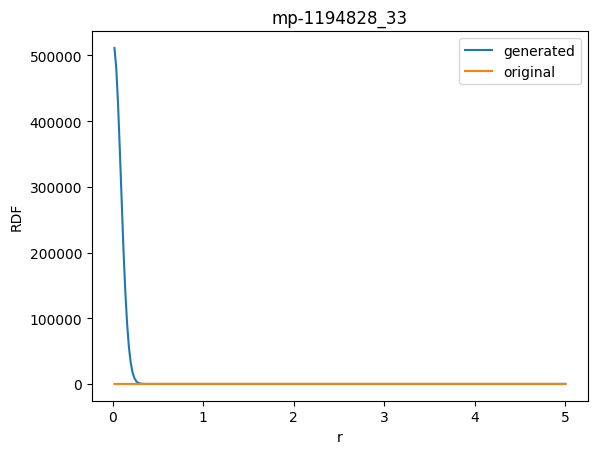

In [37]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import torch
import matplotlib.pyplot as plt

def length_from_exO(position):
    exO = position[0]
    length_list = []
    for i in range(1,len(position)):
        length = torch.norm(position[i]-exO)
        length_list.append(length)
    return length_list


def RDF(position,sigma=4.0,R=5.0,dR=0.02):
    length_list = length_from_exO(position)
    num_atom = position.shape[0]
    ro = num_atom/(4/3*np.pi*R**3)
    dR
    R = np.arange(0+dR,R+dR,dR)
    RDF = []
    for r in R:
        RDF.append(sum([1 for d in length_list if r < d < r+dR])/(4*np.pi*ro*r**2*dR))
    RDF_smoothed = gaussian_filter1d(RDF, sigma)    
    return RDF_smoothed

generated_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250116_115325-edag56hk/files/generated_graph.pt")
original_graph_list = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250116_115325-edag56hk/files/original_graph.pt")
for i in range(len(original_graph_list)):
    if original_graph_list[i].id == 'mp-1194828_33':
        print(i)
        id = original_graph_list[i].id
        generated_RDF = RDF(generated_graph_list[i][-1].pos)
        original_RDF = RDF(original_graph_list[i].pos)
        generated_RDF_cpu = RDF(generated_graph_list[i][-1].pos.cpu())
        original_RDF_cpu = RDF(original_graph_list[i].pos.cpu())
        break
x = np.arange(0.02,5.02,0.02)
fig, ax = plt.subplots()
ax.plot(x,generated_RDF,label='generated')
ax.plot(x,original_RDF,label='original')
ax.legend()
ax.set_xlabel('r')
ax.set_ylabel('RDF')
ax.set_title(f'{id}')
plt.show()

In [47]:
import torch

dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_5_ang/dataset.pt")
data = dataset[0]
print(data.spectrum[1])


/tmp/ipykernel_5576/2772170221.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_5_ang/data

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])


In [50]:
import torch
dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_3_ang/dataset.pt')
data = dataset[0]
print(data.edge_index)

/tmp/ipykernel_5576/4022907425.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_3_ang/data

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
          3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
          4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
          9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
          3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
         10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
          6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
          2,  3,  4,  5,  6,  7,  8,  9, 10,  0

In [54]:
import os
import torch
import data_preparation
from torch_geometric.data import Data

source_path = '/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/dat_files'
dirs = [d for d in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, d))]
dirs = [d for d in dirs if os.path.exists(os.path.join(source_path,d,'coreloss.cell'))]

dataset = []
for d in dirs:
    atom_list = cell_to_atom_list(os.path.join(source_path,d,'coreloss.cell'))
    graph = atom_list_to_graph(atom_list,cutoff=3.0)
    spectrum = data_preparation.fitted_intensity(os.path.join(source_path,d,'coreloss_core_edge.dat'))
    num_of_atoms = graph.x.shape[0]
    spectrum_tensor = torch.zeros(num_of_atoms,spectrum.shape[0])
    spectrum_tensor[0] = torch.tensor(spectrum,dtype=torch.float32)
    exO_tensor = torch.zeros(num_of_atoms,1)
    exO_tensor[0] = 1
    graph.spectrum = spectrum_tensor
    graph.exO = exO_tensor
    graph.id = d
    dataset.append(graph)
print(len(dataset))
torch.save(dataset,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_3_ang/dataset.pt')

2067


In [31]:
import torch
original_dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_5_ang/dataset.pt')
edge_dataset = []
for data in original_dataset:
    if data.x.shape[0] == 1:
        continue
    edge_index = []
    min_norm = 100
    min_index = None
    for i in range(data.x.shape[0]):
        for j in range(data.x.shape[0]):
            if i != j:
                if torch.norm(data.pos[i]-data.pos[j]) < min_norm and torch.norm(data.pos[i]-data.pos[j]) > 2.0:
                    min_norm = torch.norm(data.pos[i]-data.pos[j])
                    min_index = [i,j]
                if torch.norm(data.pos[i]-data.pos[j]) < 2.0:
                    edge_index.append([i,j])
    if len(edge_index) == 0:
        edge_index.append(min_index)
    edge_index = torch.tensor(edge_index,dtype=torch.long).t().contiguous()
    edge_data = Data(x=data.x,pos=data.pos,edge_index=edge_index,spectrum=data.spectrum,exO=data.exO,id=data.id)
    edge_dataset.append(edge_data)
torch.save(edge_dataset,'/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_5_ang/dataset_edge_only_within_2ang.pt')

/tmp/ipykernel_609429/783274579.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_dataset = torch.load('/mnt/homenfsxx/rokubo/data/diffusion_model/dataset/within_

In [2]:
import torch, os
import numpy as np

dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250114_162127-6n1j0cwg/files/original_graph.pt")
length_list = []
for data in dataset:
    for i in range(1,data.x.shape[0]):
        length = torch.norm(data.pos[i]-data.pos[0])
        length_list.append(length.item())
        if length < 1.0:
            print(data.id)
            print(length)

/tmp/ipykernel_374603/3801118575.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/mnt/homenfsxx/rokubo/data/diffusion_model/wandb/run-20250114_1621

In [24]:
import torch, os

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')

dataset_except_CN0 = []
for data in dataset:
    if data.x.shape[0] != 1:
        dataset_except_CN0.append(data)
torch.save(dataset_except_CN0,'/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset_except_CN0.pt')

/tmp/ipykernel_609429/4216074692.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/datase

In [7]:
import torch, os
import numpy as np
import matplotlib.pyplot as plt

def find_line_number(file_path, target_text):
    with open(file_path, 'r') as file:
        line_number = 0
        for line in file:
            line_number += 1
            if target_text in line:
                return line_number
        # 特定の文言が見つからない場合
        return None

def normalize_list(input_list):
    # リスト内の最小値と最大値を見つける
    min_val = min(input_list)
    max_val = max(input_list)
    # スケーリングするための範囲を計算
    range_val = max_val - min_val
    # スケーリングされた値を計算して新しいリストに追加
    normalized_list = [(x - min_val) / range_val for x in input_list]
    return normalized_list

def fitted_intensity(coreloss_core_edge_path):
    target_text = "#  O 1    K1      O:ex"
    line_number = find_line_number(coreloss_core_edge_path,target_text)
    data = np.loadtxt(coreloss_core_edge_path,skiprows=line_number).T
    energies = np.array(data[0])
    intensities = np.array(normalize_list(data[1]))
    return energies, intensities

dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/dat_files')
dirs = [d for d in dirs if os.path.exists(os.path.join('/home/rokubo/jbod/data/diffusion_model/dataset/dat_files',d,'coreloss_core_edge.dat'))]
for d in dirs:
    os.makedirs(os.path.join('/home/rokubo/jbod/data/diffusion_model/dataset/spectrums',d),exist_ok=True)
    energy, intensity = fitted_intensity(os.path.join('/home/rokubo/jbod/data/diffusion_model/dataset/dat_files',d,'coreloss_core_edge.dat'))
    fig, ax = plt.subplots()
    ax.plot(energy,intensity,'-')
    ax.set_xlabel('energy')
    ax.set_ylabel('intensity')
    ax.set_xlim(-1,30)
    ax.set_title(d)
    plt.savefig(os.path.join('/home/rokubo/jbod/data/diffusion_model/dataset/spectrums',d,'spectrum.png'))
    plt.close()


In [26]:
import torch
import os

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/dataset.pt')
new_dataset = []
for data in dataset:
    if 'mp-1398433' in data.id:
        print(data.id)
    else:
        new_dataset.append(data)
torch.save(new_dataset,'/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/dataset_except_mp-1398433.pt')

/tmp/ipykernel_609429/616089194.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/dataset

mp-1398433_4
mp-1398433_5
mp-1398433_6
mp-1398433_7
mp-1398433_8
mp-1398433_9
mp-1398433_10
mp-1398433_11


In [11]:
import wandb
import torch
import os
import numpy as np
from CN2_evaluate import calculate_angle_for_CN2, calculate_bond_length_for_CN2

project_name = str(input('project_name : '))
run_id = str(input('run_id : '))
api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])
original_angle_list, generated_angle_list = [], []
original_bond_length_list, generated_bond_length_list = [], []
original_coords, generated_coords = [], []
for data in original_graph_list:
    original_coords.append(data.pos)
for data in generated_graph_list:
    generated_coords.append(data[-1].pos)
for i in range(len(original_coords)):
    original_angle_list.append(calculate_angle_for_CN2(original_coords[i]))
    generated_angle_list.append(calculate_angle_for_CN2(generated_coords[i]))
    original_bond_length_list.append(calculate_bond_length_for_CN2(original_coords[i]))
    generated_bond_length_list.append(calculate_bond_length_for_CN2(generated_coords[i]))
average_theta_per_graph, average_phi_per_graph = [], []
average_original_per_graph, average_generated_per_graph = [], []
id_list = []
how_many_gen = 5
for i in list(range(0,len(original_angle_list),how_many_gen)):
    if np.isnan(np.mean(original_angle_list[i:i+how_many_gen])) or np.isnan(np.mean(generated_angle_list[i:i+how_many_gen])) or np.isnan(np.mean(original_bond_length_list[i:i+how_many_gen])) or np.isnan(np.mean(generated_bond_length_list[i:i+how_many_gen])):
        continue
    else:
        average_theta_per_graph.append(np.mean(original_angle_list[i:i+how_many_gen]))
        average_phi_per_graph.append(np.mean(generated_angle_list[i:i+how_many_gen]))
        average_original_per_graph.append(np.mean(original_bond_length_list[i:i+how_many_gen]))
        average_generated_per_graph.append(np.mean(generated_bond_length_list[i:i+how_many_gen]))
        id_list.append(original_graph_list[i].id)

for i in range(len(average_original_per_graph)):
    #angle = average_theta_per_graph[i]
    angle = average_phi_per_graph[i]
    if angle > 134 and angle < 138:
        print(id_list[i])
        print(average_theta_per_graph[i])
        print(average_phi_per_graph[i])


/tmp/ipykernel_476637/4289680706.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_graph_list = torch.load(config['original_graph_save_path'])
/tmp/ipykernel_476

mp-555147_2
134.562513064905
135.90074110068295
mp-558203_4
125.80272715247197
137.74708876542346
mp-1245026_56
137.37541719154805
136.74649610484897
mp-1179195_7
158.97557625301155
137.55646228380192
mp-557118_1
136.73014189990025
134.09574886532903
mp-558200_1
134.64436605191844
134.81310997347708
mp-554267_8
135.04774336392106
136.42489801381672
mp-555544_7
115.65814770657548
136.43001519154288
mp-558564_13
137.8055415243404
135.5669688804741
mp-558366_3
95.65546060895126
135.6737657183364
mp-556985_10
121.69170459293298
136.99160427340402
mp-1244945_85
115.08173438213979
136.91685468312738
mp-1245026_45
123.87933222181803
134.55679756260753


In [ ]:
from ase.io import read
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import rdFingerprintGenerator
import numpy as np
import torch, os
import wandb

# 原子間の結合を距離に基づいて推定する
def guess_bonds(atoms, threshold=1.2):
    """
    原子間距離を基に結合を推定する。
    :param atoms: ASE Atomsオブジェクト
    :param threshold: 結合距離のスケールファクター（原子半径の和に掛ける）
    :return: RDKitのMolオブジェクト
    """
    # ASEから元素と座標を取得
    symbols = atoms.get_chemical_symbols()
    positions = atoms.get_positions()

    # RDKit Molオブジェクトを初期化
    mol = Chem.RWMol()

    # RDKitの原子を追加
    atom_indices = []
    for symbol in symbols:
        atom = Chem.Atom(symbol)
        atom.SetNoImplicit(True)  # 暗黙の水素を無効化
        atom_indices.append(mol.AddAtom(atom))

    # 結合距離の閾値を決定
    covalent_radii = Chem.GetPeriodicTable().GetRcovalent  # 共価半径
    for i, pos1 in enumerate(positions):
        for j, pos2 in enumerate(positions):
            if i >= j:  # 対称行列の下側のみを計算
                continue
            distance = np.linalg.norm(pos1 - pos2)
            # 原子半径の和にスケールファクターを掛けて結合を判定
            if distance < threshold * (covalent_radii(symbols[i]) + covalent_radii(symbols[j])):
                mol.AddBond(i, j, Chem.BondType.SINGLE)

    # 部分的なサニタイズを実行（暗黙の水素を無視）
    Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_SYMMRINGS)

    return mol

# フィンガープリントを生成
def generate_fingerprint(mol):
    # MorganGeneratorの作成
    morgan_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

    # フィンガープリントの生成
    fp = morgan_generator.GetFingerprint(mol)
    return fp

# 類似性計算
def calculate_similarity(fp1, fp2):
    return DataStructs.TanimotoSimilarity(fp1, fp2)

def eval_by_xyz(xyz_file1,xyz_file2):
    # XYZファイルをASEで読み込み
    atoms1 = read(xyz_file1)
    atoms2 = read(xyz_file2)

    # 分子を生成
    mol1 = guess_bonds(atoms1)
    mol2 = guess_bonds(atoms2)

    # フィンガープリントを生成
    fp1 = AllChem.GetAtomPairFingerprint(mol1)
    fp2 = AllChem.GetAtomPairFingerprint(mol2)

    # 類似性を計算
    similarity = calculate_similarity(fp1, fp2)
    return similarity


project_name = str(input('project_name : '))
run_id = str(input('run_id : '))
api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])



Tanimoto Similarity: 0.06451612903225806


[15:08:52] DEPRECATION WARNING: please use AtomPairGenerator
[15:08:52] DEPRECATION WARNING: please use AtomPairGenerator


In [33]:
import numpy as np
import torch
import os
from scipy.optimize import linear_sum_assignment
import wandb
import itertools

def kabsch_numpy(P, Q):
    """
    Computes the optimal rotation and translation to align two sets of points (P -> Q),
    and their RMSD.

    :param P: A Nx3 matrix of points
    :param Q: A Nx3 matrix of points
    :return: A tuple containing the optimal rotation matrix, the optimal
             translation vector, and the RMSD.
    """
    assert P.shape == Q.shape, "Matrix dimensions must match"

    # Center the points
    p = P - P[0]
    q = Q - Q[0]

    # Compute the covariance matrix
    H = np.dot(p.T, q)

    # SVD
    U, S, Vt = np.linalg.svd(H)

    # Validate right-handed coordinate system
    if np.linalg.det(np.dot(Vt.T, U.T)) < 0.0:
        Vt[-1, :] *= -1.0

    # Optimal rotation
    R = np.dot(Vt.T, U.T)

    # RMSD
    rmsd = np.sqrt(np.sum(np.square(np.dot(p, R.T) - q)) / P.shape[0])

    return R, rmsd

def hungarian_algorithm(P,Q):
    D = np.linalg.norm(P[:, None, :] - Q[None, :, :], axis=-1)
    row_ind, col_ind = linear_sum_assignment(D)
    return row_ind, col_ind

def return_near_from_exO(position):
    exO = position[0]
    length_list, index_list = [], []
    for i in range(1,len(position)):
        length_list.append(torch.norm(position[i]-exO).item())
        index_list.append(i)
    length_index_list = list(zip(length_list,index_list))
    sorted_legnth_index_list = sorted(length_index_list,key=lambda x:x[0])
    sorted_length_list, sorted_index_list = zip(*sorted_legnth_index_list)
    return sorted_index_list[:5]

#project_name = str(input('project_name : '))
#run_id = str(input('run_id : '))
project_name = 'pos_generation'
run_id = 'puffam3k'
api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config

original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])

for i in range(len(original_graph_list)):
    if original_graph_list[i].id == 'mp-1244945_40':
        original_graph = original_graph_list[i]
        generated_graph = generated_graph_list[i][-1]
        break


print(original_graph.pos.shape)

original_near_index_list = return_near_from_exO(original_graph.pos)
generated_near_index_list = return_near_from_exO(generated_graph.pos)

original_near_exO = torch.zeros(5,3)
generated_near_exO = torch.zeros(5,3)
original_near_exO[0] = original_graph.pos[0]
generated_near_exO[0] = generated_graph.pos[0]
perms = list(itertools.permutations(range(4)))
min_rmsd = 100
min_R = None
for i in range(4):
    original_near_exO[i+1] = original_graph.pos[original_near_index_list[i]]
for perm in perms:
    for i in perm:
        generated_near_exO[i+1] = generated_graph.pos[generated_near_index_list[perm[i]]]
    R, rmsd = kabsch_numpy(generated_near_exO.cpu().numpy(),original_near_exO.cpu().numpy())
    if rmsd < min_rmsd:
        min_rmsd = rmsd
        min_R = R

print(min_rmsd)
print(min_R)


generated_pos = generated_graph.pos.cpu().numpy()
generated_pos = generated_pos - generated_pos[0]
original_pos = original_graph.pos.cpu().numpy()
original_pos = original_pos - original_pos[0]
aligned_generated_pos = np.dot(generated_pos,min_R.T)
row_ind, col_ind = hungarian_algorithm(original_pos,aligned_generated_pos)
print(row_ind)
print(col_ind)
adjusted_generated_pos = aligned_generated_pos[col_ind]
adjusted_original_pos = original_pos[row_ind]

print(adjusted_generated_pos)
print(adjusted_original_pos)

_, rmsd = kabsch_numpy(adjusted_original_pos,adjusted_generated_pos)
print(rmsd)



/tmp/ipykernel_476637/2691210246.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_graph_list = torch.load(config['original_graph_save_path'])
/tmp/ipykernel_476

torch.Size([7, 3])
1.293959979280084
[[-0.01569849  0.5240013  -0.8515728 ]
 [ 0.6573565   0.6471556   0.3860984 ]
 [ 0.7534162  -0.5537257  -0.3546151 ]]
[0 1 2 3 4 5 6]
[0 2 1 4 3 5 6]
[[ 0.          0.          0.        ]
 [ 0.7061157   0.17870979 -1.4742482 ]
 [-1.3339846  -0.02767405  0.9670815 ]
 [-0.01342571  2.6414804  -0.91435444]
 [-1.7797194   1.2878017   1.4008619 ]
 [ 0.98612213  1.3229076  -2.4730558 ]
 [-0.9987726  -1.0269035   2.4776485 ]]
[[ 0.          0.          0.        ]
 [ 0.54286385  0.76915836 -1.3188639 ]
 [-1.4258747  -0.23096538  0.72400653]
 [ 0.841979    2.3307037  -0.9536911 ]
 [-2.4746072   0.8987031   0.1599654 ]
 [ 1.860393   -0.07263136 -1.7381824 ]
 [-1.2228088   0.0086152   2.3349242 ]]
0.7559055386088088


In [47]:
import torch
dataset = torch.load("/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/dataset.pt")
for data in dataset:
    if data.id == 'mp-1244945_40':
        print(data.pos.shape)

/tmp/ipykernel_476637/3360743770.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/datase

torch.Size([34, 3])


/tmp/ipykernel_609429/3621759569.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/datase

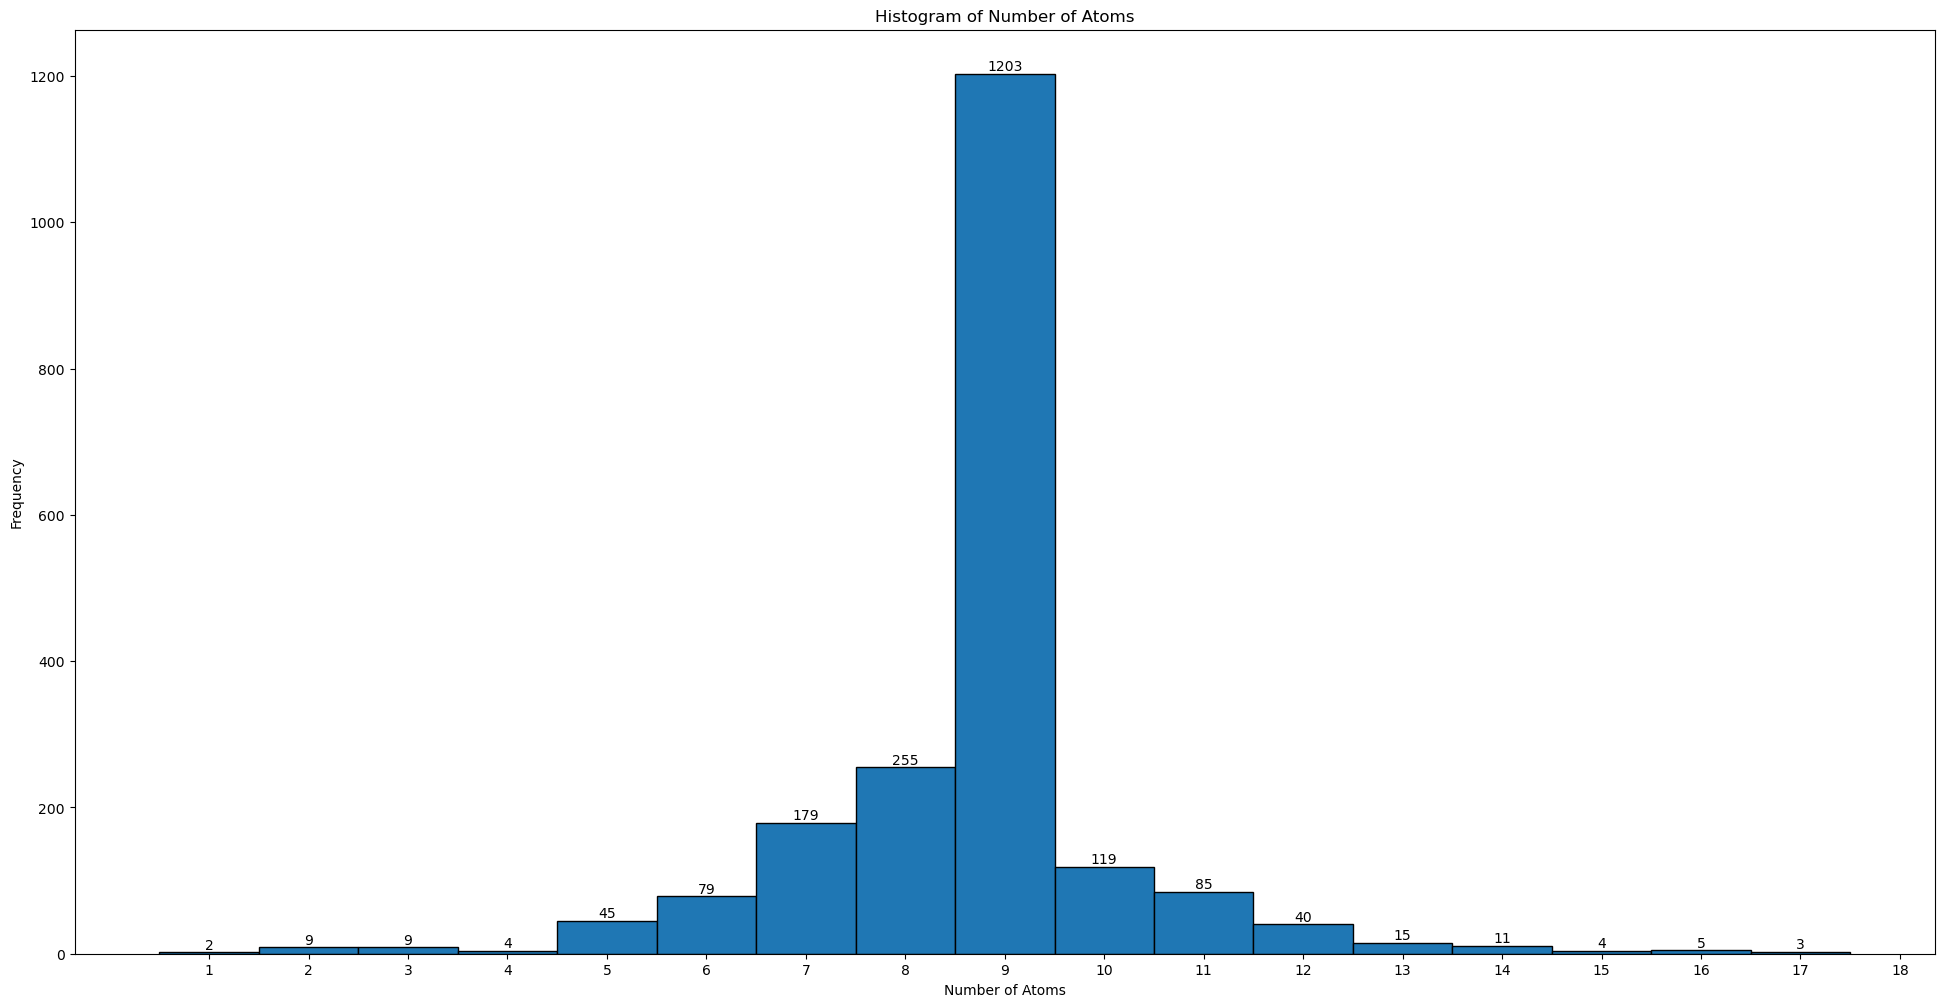

In [33]:
import torch
import os
import matplotlib.pyplot as plt

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')
num_atom_list = []
for data in dataset:
    num_atom_list.append(data.x.shape[0])


plt.figure(figsize=(24,12))
# ヒストグラムのプロット
counts, bins, patches = plt.hist(num_atom_list, bins=range(min(num_atom_list), max(num_atom_list) + 1), align='left', edgecolor='black')

# 横軸の値を設定
plt.xticks(range(min(num_atom_list), max(num_atom_list) + 1))

# 各バーの上に要素数を表示
for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, int(count), ha='center', va='bottom')

# グラフの表示
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Atoms')
plt.show()

In [13]:
import torch, os

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/dataset.pt')
for data in dataset:
    print(data.edge_index)
    print(data.edge_index[:,0])
    break


/tmp/ipykernel_538530/1513914130.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/datase

tensor([[ 0,  0,  0,  ..., 84, 84, 84],
        [ 1,  2,  3,  ..., 81, 82, 83]])
tensor([0, 1])


In [27]:
import torch, os

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')
ref_dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/first_nearest/dataset_only_CN2_Si_except_mp-1398433.pt')
new_dataset = []
ref_id = []
for data in ref_dataset:
    ref_id.append(data.id)
for data in dataset:
    if data.id in ref_id:
        new_dataset.append(data)
print(len(new_dataset))
torch.save(new_dataset,'/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset_CN2.pt')
    


/tmp/ipykernel_609429/1416353033.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/datase

1963


In [23]:
import numpy as np
import torch, os
import wandb

Api = wandb.Api()
project_name = 'pos_generation'
run_id = '8q6dzme0'
run = Api.run(f'{project_name}/{run_id}')
config = run.config
original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])
original_data = original_graph_list
generated_data = generated_graph_list

original_coords, generated_coords = [],[]
for data in original_data:
    original_coords.append(data.pos)
for data in generated_data:
    generated_coords.append(data[-1].pos)

original_CN2, generated_CN2 = [],[]
a = 0
for i in range(len(original_coords)):
    if original_coords[i].shape[0] < 3 or generated_coords[i].shape[0] < 3:
        continue
    length_check_original, length_check_generated = [],[]
    index_original, index_generated = [],[]    
    for j in range(original_coords[i].shape[0]):
        length_check_original.append(torch.norm(original_coords[i][j]-original_coords[i][0]).item())
        index_original.append(j)
    for j in range(generated_coords[i].shape[0]):
        length_check_generated.append(torch.norm(generated_coords[i][j]-generated_coords[i][0]).item())
        index_generated.append(j)
    sorted_index_length_original = sorted(list(zip(index_original,length_check_original)),key=lambda x:x[1])
    sorted_index_length_generated = sorted(list(zip(index_generated,length_check_generated)),key=lambda x:x[1])
    sorted_index_original, sorted_length_original = zip(*sorted_index_length_original)
    sorted_index_generated, sorted_length_generated = zip(*sorted_index_length_generated)
    tensor_original = torch.zeros((3,3))
    tensor_generated = torch.zeros((3,3))
    tensor_original[0] = original_coords[i][sorted_index_original[0]]
    tensor_original[1] = original_coords[i][sorted_index_original[1]]
    tensor_original[2] = original_coords[i][sorted_index_original[2]]
    tensor_generated[0] = generated_coords[i][sorted_index_generated[0]]
    tensor_generated[1] = generated_coords[i][sorted_index_generated[1]]
    tensor_generated[2] = generated_coords[i][sorted_index_generated[2]]
    original_CN2.append(tensor_original)
    generated_CN2.append(tensor_generated)
    if sorted_length_original[1] > 1.9 or sorted_length_original[2] > 1.9:
        a += 1
original_coords = original_CN2
generated_coords = generated_CN2

print(len(original_data))
print(a)

/tmp/ipykernel_538530/4293604432.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_graph_list = torch.load(config['original_graph_save_path'])
/tmp/ipykernel_538

975
160


In [4]:
import numpy as np
import torch, os

dataset = torch.load("/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt")
check_list = []
for data in dataset:
    flag = True
    length_list = []
    for i in range(1,data.x.shape[0]):
        length = torch.norm(data.pos[i]-data.pos[0])
        length_list.append(length.item())
    for i in range(len(length_list)):
        if length_list[i] < 1.6:
            if torch.equal(data.x[i].cpu(),torch.tensor([1,0]).cpu()):
                flag = False
    if flag:
        check_list.append(data.id)

print(len(check_list))
            
print(check_list)

/tmp/ipykernel_609429/1939501326.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/datase

1563
['mp-10064_1', 'mp-1021503_1', 'mp-1063118_2', 'mp-1071820_1', 'mp-10948_1', 'mp-11684_2', 'mp-11684_5', 'mp-11684_6', 'mp-1173536_14', 'mp-1173536_15', 'mp-1173536_16', 'mp-1173536_17', 'mp-1173536_22', 'mp-1173536_23', 'mp-1173536_25', 'mp-1173536_26', 'mp-1173536_28', 'mp-1173536_29', 'mp-1173536_32', 'mp-1173536_36', 'mp-1173536_38', 'mp-1173536_39', 'mp-1173536_40', 'mp-1173536_41', 'mp-1173536_42', 'mp-1179195_5', 'mp-1179195_6', 'mp-1179195_8', 'mp-1179195_10', 'mp-1179195_11', 'mp-1179195_12', 'mp-1179275_5', 'mp-1179275_6', 'mp-1179275_9', 'mp-1179275_11', 'mp-1179275_12', 'mp-1179275_13', 'mp-1179447_2', 'mp-1179447_3', 'mp-1179447_4', 'mp-1179447_6', 'mp-1179454_1', 'mp-1179508_2', 'mp-1179508_3', 'mp-1179508_4', 'mp-1179529_2', 'mp-1179529_3', 'mp-1179529_4', 'mp-1179651_10', 'mp-1179651_11', 'mp-1179651_12', 'mp-1179651_13', 'mp-1179651_14', 'mp-1179651_16', 'mp-1179651_17', 'mp-1179651_18', 'mp-1179651_19', 'mp-1179651_21', 'mp-1179651_22', 'mp-1179651_25', 'mp-11948

In [24]:
import torch, os

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')
xyz_dir = os.listdir("/home/rokubo/jbod/data/diffusion_model/xyz/sfffh8xn")
for data in dataset:
    if data.x.shape[0] == 10:
        #print(data.id)
        for xyz in xyz_dir:
            if data.id in xyz:
                print(data.id)
                break


/tmp/ipykernel_683153/2725126096.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/datase

mp-1244968_63
mp-1245026_42
mp-1245026_70
mp-554175_3
mp-556068_2
mp-557723_4
mp-557771_9
mp-557873_11
mp-600045_5
mp-638049_1


In [5]:
import os, shutil, sys
from pymatgen.core import structure
from pymatgen.io.cif import CifParser
sys.path.append('/jbod/rokubo/data/diffusion_model/dataset/fujikata_structure/')
import make_input_from_cif


dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels')
for d in dirs:
    cif_name = d + '.cif'
    cif_path = f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/cif/{cif_name}'
    parser = CifParser(cif_path)
    structure = parser.get_structures()[0]
    num_O = 0
    for site in structure.sites:
        if site.species_string == 'O':
            num_O += 1
    for i in range(num_O):
        with open(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/base.cell','r') as f:
            lines = f.readlines()
        os.makedirs(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/{i}',exist_ok=True)
        lines[6+i] = lines[6+i].replace('O','O:ex')
        lines[-7] = 'kpoint_mp_spacing 0.1\n'
        with open(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/{i}/singlepoint.cell','w') as f:
            f.writelines(lines)
        with open(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/{i}/coreloss.cell','w') as f:
            f.writelines(lines)
        #make_input_from_cif.make_param_file(cif_path,f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/{i}/singlepoint.param',type='singlepoint')
        #make_input_from_cif.make_param_file(cif_path,f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/{i}/coreloss.param',type='spectral')
        #make_input_from_cif.make_odi_file(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/{i}/coreloss.odi')

    

In [6]:
import os, shutil

dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels')
for d in dirs:
    if d == 'SiO0.5_0_relaxed':
        continue
    dir_path = f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}'
    length = [a for a in os.listdir(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}') if os.path.isdir(os.path.join(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}',a))]
    with open(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/jobscript.sh','r') as f:
        lines = f.readlines()
    lines[1] = f'#SBATCH --chdir={dir_path}\n'
    lines[8] = f'#SBATCH -a 0-{len(length)-1}:1\n'
    lines[12] = 'cd $SLURM_ARRAY_TASK_ID\n'
    with open(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/jobscript.sh','w') as f:
        f.writelines(lines)


In [37]:
import os, torch
import wandb
from pymatgen.core import structure
from pymatgen.io.cif import CifParser

"""
project_name = 'xh_gen'
run_id = 'sfffh8xn'
api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])

for i in range(len(generated_graph_list)):
    graph = generated_graph_list[i][-1]
    if not torch.equal(graph.x[0].cpu(),torch.tensor([1,0]).cpu()):
        print(graph.x)
        print(original_graph_list[i].id)
"""

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')
dirs = os.listdir('/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/cif')
compostion_dict = {}
for d in dirs:
    paraser = CifParser(f'/mnt/homenfsxx/rokubo/o-si_mp_voptados_8ang_primitive/cif/{d}')
    structure = parser.get_structures()[0]
    composition = structure.composition
    if composition in compostion_dict:
        compostion_dict[composition] += 1
    else:
        compostion_dict[composition] = 1
print(compostion_dict)

/tmp/ipykernel_666910/3720171528.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/datas

{Composition('Si72 O144'): 343}


In [12]:
from collections import Counter
import matplotlib.pyplot as plt
from mp_api.client import MPRester
import os

# Materials Project APIキーを設定
api_key = "aeeKkZmLk09mwfZHK5kgooKUyRoUxh6C"

# MPResterインスタンスを作成
with MPRester(api_key) as mpr:
    # クエリを実行してデータを取得
    results = mpr.summary.search(elements=["Si", "O"], fields=["material_id", "formula_pretty", "elements"])

# デバッグ: 検索結果の確認
print(f"Total results: {len(results)}")
for result in results[:5]:  # 最初の5件を表示
    print(result.material_id, result.formula_pretty, result.elements)

# SiとOのみを含む物質をフィルタリング
filtered_results = [result for result in results if set([el.symbol for el in result.elements]) == {"O", "Si"}]

# デバッグ: フィルタリング結果の確認
print(f"Filtered results: {len(filtered_results)}")
#for result in filtered_results[:5]:  # 最初の5件を表示
    #print(result.material_id, result.formula_pretty, result.elements)
"""
# 組成式のリストを作成
formulas = [result.formula_pretty for result in filtered_results]

# 組成式の分布をカウント
formula_counts = Counter(formulas)

# 組成式とその出現回数を取得
if formula_counts:
    formulas, counts = zip(*formula_counts.items())

    # 組成式の分布をプロット
    plt.figure(figsize=(10, 6))
    bars = plt.bar(formulas, counts)
    plt.xlabel('Composition Formula')
    plt.ylabel('Count')
    plt.title('Distribution of Si-O Compounds in Materials Project')
    plt.xticks(rotation=90)
    plt.tight_layout()
    # 各バーの上に要素数を表示
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.show()
else:
    print("No Si-O compounds found.")
"""
ids = [result.material_id for result in filtered_results]
current_dataset_ids = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/cif')
current_dataset_ids = [id for id in current_dataset_ids if 'mp-' in id]
current_dataset_ids = [id.split('.')[0] for id in current_dataset_ids]
for id in ids:
    if id not in current_dataset_ids:
        id = str(id)
        with MPRester(api_key) as mpr:
            structure = mpr.get_structure_by_material_id(str(id))
        cell_size = 2
        while structure.lattice.a < 8:
            new_lattice_a = structure.lattice.a * cell_size
            cell_size += 1
        cell_size = 2
        while structure.lattice.b < 8:
            new_lattice_b = structure.lattice.b * cell_size
            cell_size += 1
        cell_size = 2
        while structure.lattice.c < 8:
            new_lattice_c = structure.lattice.c * cell_size
            cell_size += 1
        structure.lattice.a = new_lattice_a
        structure.lattice.b = new_lattice_b
        structure.lattice.c = new_lattice_c
        structure.modify_lattice(structure.lattice)
        cif_writer = CifWriter(structure)
        cif_writer.write_file(f'~/jbod/data/etc_related_to_calc/mp_v20241218/cif/{id}.cif')


/tmp/ipykernel_719233/1403893487.py:12: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  results = mpr.summary.search(elements=["Si", "O"], fields=["material_id", "formula_pretty", "elements"])
Retrieving SummaryDoc documents: 100%|██████████| 7629/7629 [00:01<00:00, 5606.91it/s]


Total results: 7629
mp-1244945 SiO2 [Element O, Element Si]
mp-1244965 SiO2 [Element O, Element Si]
mp-1244968 SiO2 [Element O, Element Si]
mp-1245026 SiO2 [Element O, Element Si]
mp-1391176 SiO4 [Element O, Element Si]
Filtered results: 343


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


MPRestError: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-685184/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}

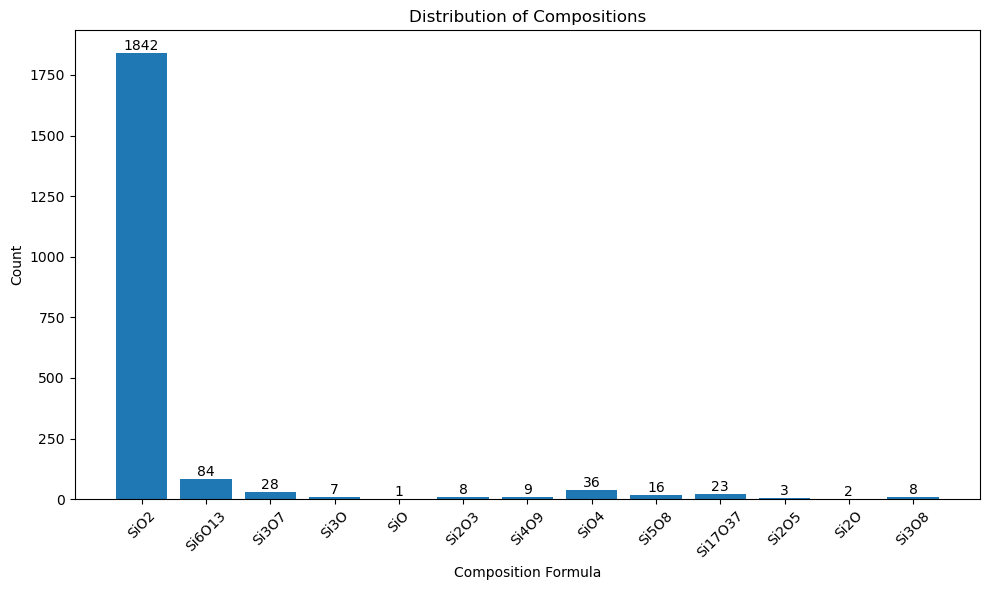

In [71]:
import os, torch
from data_preparation import read_castep_output_structure

dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/dat_files')
composition_dict = {}
for d in dirs:
    cell_path = f'/home/rokubo/jbod/data/diffusion_model/dataset/dat_files/{d}/coreloss.cell'
    structure = read_castep_output_structure(cell_path)
    composition = structure.composition.reduced_formula
    if composition in composition_dict:
        composition_dict[composition] += 1
    else:
        composition_dict[composition] = 1

# 組成式と要素数を取得
formulas = list(composition_dict.keys())
counts = list(composition_dict.values())

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
bars = plt.bar(formulas, counts)

# 各バーの上に要素数を表示
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# グラフのラベルとタイトルを設定
plt.xlabel('Composition Formula')
plt.ylabel('Count')
plt.title('Distribution of Compositions')
plt.xticks(rotation=45)
plt.tight_layout()

# グラフを表示
plt.show()    


In [76]:
import os, torch
from pymatgen.core import structure
from pymatgen.io.cif import CifParser
num_site_list = []
dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/cif')
for d in dirs:
    parser = CifParser(f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/cif/{d}')
    structure = parser.get_structures()[0]
    num_site_list.append(len(structure.sites))
print(num_site_list)
    

[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 210, 210, 210, 210, 210, 160, 160, 160, 160, 160, 200, 200, 200, 200, 200, 225, 225, 225, 225, 225, 240, 240, 240, 240, 240, 220, 220, 220, 220, 220, 216, 216, 216, 216, 216]


In [1]:
import os, torch
from pymatgen.core import structure
from pymatgen.io.cif import CifWriter
from data_preparation import read_castep_output_structure

dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/dat_files')
mp_id = None
for d in dirs:
    if mp_id == d.split('_')[0]:
        continue
    mp_id = d.split('_')[0]
    cell_path = f'/home/rokubo/jbod/data/diffusion_model/dataset/dat_files/{d}/coreloss.cell'
    structure = read_castep_output_structure(cell_path)
    cif_writer = CifWriter(structure)
    cif_writer.write_file(f'/home/rokubo/jbod/data/diffusion_model/dataset/cif/{mp_id}.cif')


In [4]:
import os

dirs = os.listdir('/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels')
for d in dirs:
    path = f'/home/rokubo/jbod/data/diffusion_model/dataset/fujikata_structure/eels/{d}/base.cell'
    with open(path,'r') as f:
        lines = f.readlines()
    lines[-1] = '%ENDBLOCK SPECIES_POT'
    with open(path,'w') as f:
        f.writelines(lines)

/tmp/ipykernel_683153/2205916525.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_graph_list = torch.load(config['original_graph_save_path'])
/tmp/ipykernel_683

mp-1194828_33 1.0
mp-673849_38 1.0
mp-1244945_57 0.9999905367390152
mp-685105_9 0.9481222857350621


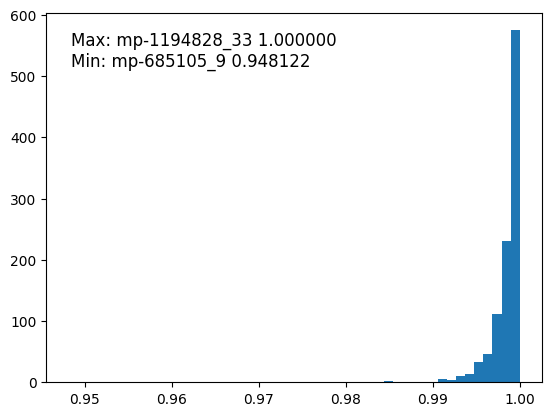

(35, 495)
[[1.         0.99857077]
 [0.99857077 1.        ]]
[[1. 1.]
 [1. 1.]]
[[1.         0.99808018]
 [0.99808018 1.        ]]
[[1.         0.99835358]
 [0.99835358 1.        ]]


In [86]:
from ase import Atoms
from dscribe.descriptors import SOAP
import numpy as np
import torch, os
import wandb
import matplotlib.pyplot as plt
from dscribe.kernels import AverageKernel, REMatchKernel
from sklearn.preprocessing import normalize


from ase.build import molecule


def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

project_name = 'xh_gen'
run_id = 'i9y3jqv1'
api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])

similarity_list = []
id_list = []
for i in range(len(original_graph_list)):
    original_graph = original_graph_list[i]
    generated_graph = generated_graph_list[i][-1]

    original_positions = original_graph.pos.cpu().numpy()
    generated_positions = generated_graph.pos.cpu().numpy()
    original_atom_list = []
    O_tensor = torch.tensor([1,0],dtype=torch.long)
    Si_tensor = torch.tensor([0,1],dtype=torch.long)
    for i in range(original_graph.x.shape[0]):
        if torch.equal(original_graph.x[i].cpu(),O_tensor.cpu()):
            original_atom_list.append('O')
        elif torch.equal(original_graph.x[i].cpu(),Si_tensor.cpu()):
            original_atom_list.append('Si')
    original_symbols = np.array(original_atom_list)
    generated_atom_list = []
    for i in range(generated_graph.x.shape[0]):
        if torch.equal(generated_graph.x[i].cpu(),O_tensor.cpu()):
            generated_atom_list.append('O')
        elif torch.equal(generated_graph.x[i].cpu(),Si_tensor.cpu()):
            generated_atom_list.append('Si')
    generated_symbols = np.array(generated_atom_list)
    original_molecule = Atoms(positions=original_positions, symbols=original_symbols)
    generated_molecule = Atoms(positions=generated_positions, symbols=generated_symbols)

    soap = SOAP(species=["O", "Si"], r_cut=2, n_max=5, l_max=8,sigma=0.05)
    original_soap = soap.create(original_molecule)
    generated_soap = soap.create(generated_molecule)



    similarity = cos_similarity(original_soap[0],generated_soap[0])
    similarity_list.append(similarity)
    id_list.append(original_graph.id)


id_similarity_list = list(zip(id_list,similarity_list))
sorted_id_similarity_list = sorted(id_similarity_list,key=lambda x:x[1])
sorted_id, sorted_similarity = zip(*sorted_id_similarity_list)
print(sorted_id[-1],sorted_similarity[-1])
print(sorted_id[-2],sorted_similarity[-2])
print(sorted_id[-3],sorted_similarity[-3])

print(sorted_id[0],sorted_similarity[0])


plt.hist(similarity_list,bins=50)
# 最大値と最小値を左上に記載
plt.text(0.05, 0.95, f'Max: {sorted_id[-1]} {sorted_similarity[-1]:.6f}\nMin: {sorted_id[0]} {sorted_similarity[0]:.6f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

print(original_soap.shape)

re = AverageKernel(metric="linear")
re_kernel = re.create([original_soap, generated_soap])
print(re_kernel)

re = AverageKernel(metric="rbf", gamma=1)
re_kernel = re.create([original_soap, generated_soap])
print(re_kernel)

# Before passing the features we normalize them. Depending on the metric, the
# REMatch kernel can become numerically unstable if some kind of normalization
# is not done.
a_features = normalize(original_soap)
b_features = normalize(generated_soap)


# Calculates the similarity with the REMatch kernel and a linear metric. The
# result will be a full similarity matrix.
re = REMatchKernel(metric="linear", alpha=1, threshold=1e-6)
re_kernel = re.create([a_features, b_features])
print(re_kernel)

# Any metric supported by scikit-learn will work: e.g. a Gaussian.
re = REMatchKernel(metric="rbf", gamma=1, alpha=1, threshold=1e-6)
re_kernel = re.create([a_features, b_features])
print(re_kernel)




/tmp/ipykernel_732186/3839670630.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_graph_list = torch.load(config['original_graph_save_path'])
/tmp/ipykernel_732

mp-615993_16 1.0000000000000002
mp-615993_16 0.9996346755567131
mp-615993_16 0.9994031894979248
mp-615993_16 0.9166040390312395


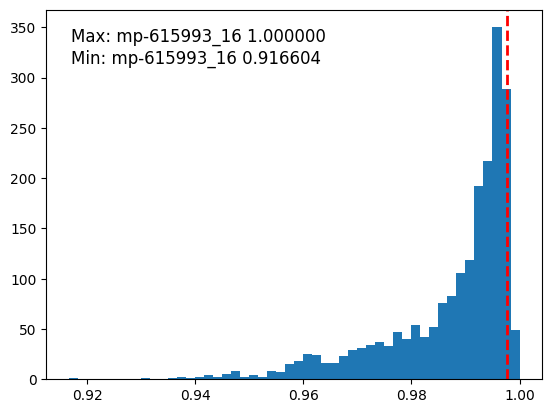

In [1]:
from ase import Atoms
from dscribe.descriptors import SOAP
import numpy as np
import torch, os
import wandb
import matplotlib.pyplot as plt
from dscribe.kernels import AverageKernel, REMatchKernel
from sklearn.preprocessing import normalize


from ase.build import molecule


def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

project_name = 'xh_gen'
run_id = 'sfffh8xn'
api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
original_graph_list = torch.load(config['original_graph_save_path'])
generated_graph_list = torch.load(config['generated_graph_save_path'])

for i in range(len(original_graph_list)):
    if original_graph_list[i].id == 'mp-615993_16':
        original_graph = original_graph_list[i]
        generated_graph = generated_graph_list[i][-1]
        break
original_positions = original_graph.pos.cpu().numpy()
generated_positions = generated_graph.pos.cpu().numpy()
original_atom_list = []
O_tensor = torch.tensor([1,0],dtype=torch.long)
Si_tensor = torch.tensor([0,1],dtype=torch.long)
for i in range(original_graph.x.shape[0]):
    if torch.equal(original_graph.x[i].cpu(),O_tensor.cpu()):
        original_atom_list.append('O')
    elif torch.equal(original_graph.x[i].cpu(),Si_tensor.cpu()):
        original_atom_list.append('Si')
original_symbols = np.array(original_atom_list)
generated_atom_list = []
for i in range(generated_graph.x.shape[0]):
    if torch.equal(generated_graph.x[i].cpu(),O_tensor.cpu()):
        generated_atom_list.append('O')
    elif torch.equal(generated_graph.x[i].cpu(),Si_tensor.cpu()):
        generated_atom_list.append('Si')
generated_symbols = np.array(generated_atom_list)
original_molecule = Atoms(positions=original_positions, symbols=original_symbols)
generated_molecule = Atoms(positions=generated_positions, symbols=generated_symbols)

soap = SOAP(species=["O", "Si"], r_cut=6, n_max=15, l_max=10,sigma=0.1)
original_soap = soap.create(original_molecule)
generated_soap = soap.create(generated_molecule)

similarity_for_generated = cos_similarity(original_soap[0],generated_soap[0])

similarity_list = []
id_list = []
dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')

for i in range(len(dataset)):
    generated_graph = dataset[i]

    original_positions = original_graph.pos.cpu().numpy()
    generated_positions = generated_graph.pos.cpu().numpy()
    original_atom_list = []
    O_tensor = torch.tensor([1,0],dtype=torch.long)
    Si_tensor = torch.tensor([0,1],dtype=torch.long)
    for i in range(original_graph.x.shape[0]):
        if torch.equal(original_graph.x[i].cpu(),O_tensor.cpu()):
            original_atom_list.append('O')
        elif torch.equal(original_graph.x[i].cpu(),Si_tensor.cpu()):
            original_atom_list.append('Si')
    original_symbols = np.array(original_atom_list)
    generated_atom_list = []
    for i in range(generated_graph.x.shape[0]):
        if torch.equal(generated_graph.x[i].cpu(),O_tensor.cpu()):
            generated_atom_list.append('O')
        elif torch.equal(generated_graph.x[i].cpu(),Si_tensor.cpu()):
            generated_atom_list.append('Si')
    generated_symbols = np.array(generated_atom_list)
    original_molecule = Atoms(positions=original_positions, symbols=original_symbols)
    generated_molecule = Atoms(positions=generated_positions, symbols=generated_symbols)

    original_soap = soap.create(original_molecule)
    generated_soap = soap.create(generated_molecule)



    similarity = cos_similarity(original_soap[0],generated_soap[0])
    similarity_list.append(similarity)
    id_list.append(original_graph.id)


id_similarity_list = list(zip(id_list,similarity_list))
sorted_id_similarity_list = sorted(id_similarity_list,key=lambda x:x[1])
sorted_id, sorted_similarity = zip(*sorted_id_similarity_list)
print(sorted_id[-1],sorted_similarity[-1])
print(sorted_id[-2],sorted_similarity[-2])
print(sorted_id[-3],sorted_similarity[-3])

print(sorted_id[0],sorted_similarity[0])

vertical_line_position = similarity_for_generated
plt.hist(similarity_list,bins=50)
plt.axvline(x=vertical_line_position, color='r', linestyle='--', linewidth=2, label=f'x = {vertical_line_position}')

# 最大値と最小値を左上に記載
plt.text(0.05, 0.95, f'Max: {sorted_id[-1]} {sorted_similarity[-1]:.6f}\nMin: {sorted_id[0]} {sorted_similarity[0]:.6f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


In [44]:
import os, torch

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/best3_similarity_for_each_graph.pt')
new_dict = {}
for data in dataset:
    new_list = []
    for key, value in data.items():
        for val in value:
            for k, v in val.items():
                new_list.append({v:k})
        new_dict[key] = new_list
    torch.save(new_dict,'/home/rokubo/jbod/data/diffusion_model/dataset/template_matching/5ang/best3_similarity_dict.pt')


/tmp/ipykernel_732186/491254697.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_5_ang/best3_s

/tmp/ipykernel_11766/557195951.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  template_soap_eval_dict = torch.load(template_matching_reference_path)
/tmp/ipykernel_117

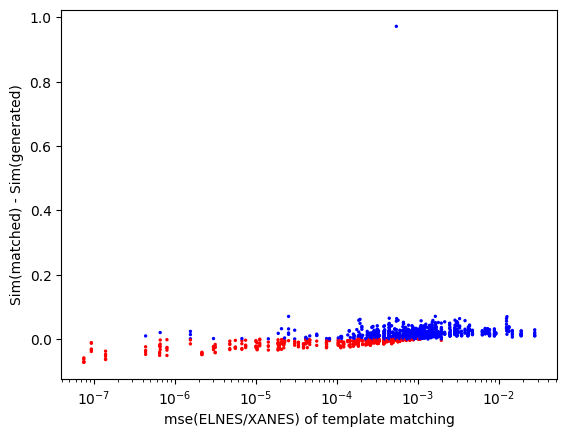

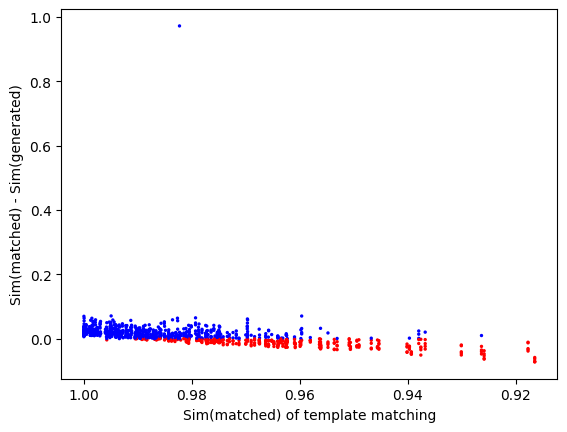

0.3233009708737864


In [193]:
import torch, os, wandb
from ase import Atoms
from dscribe.descriptors import SOAP
from template_matching import graph_to_ase_molecule
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))


project_name = 'xh_gen'
run_id = 'wsb9iztd'
template_matching_reference_path = '/home/rokubo/jbod/data/diffusion_model/dataset/template_matching/4NN/template_matching_result.pt'

template_soap_eval_dict = torch.load(template_matching_reference_path)
#print(template_soap_eval_dict)
considered_range = 25




api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
generated_graph_list = torch.load(config['generated_graph_save_path'].replace('/mnt',''))
original_graph_list = torch.load(config['original_graph_save_path'].replace('/mnt',''))

delta_list = []
similarity_list = []
mse_list = []
for i in range(1,considered_range,1):
    similarity_dict[i] = 0
    better_dict[i] = 0
    worse_dict[i] = 0
num = 0
soap = SOAP(species=["O", "Si"], r_cut=8, n_max=15, l_max=10,sigma=0.1)
for i in range(len(original_graph_list)):
    original_graph = original_graph_list[i]
    num_atom = original_graph.x.shape[0]
    generated_graph = generated_graph_list[i][-1]
    id = original_graph.id
    original_molecule = graph_to_ase_molecule(original_graph)
    generated_molecule = graph_to_ase_molecule(generated_graph)
    original_soap = soap.create(original_molecule)
    generated_soap = soap.create(generated_molecule)
    similarity = cos_similarity(original_soap[0],generated_soap[0])
    template_best = float(list(template_soap_eval_dict[id][0].values())[0][1])
    mse = float(list(template_soap_eval_dict[id][0].values())[0][0])
    mse_list.append(mse)
    similarity_list.append(template_best)
    delta_list.append(template_best-similarity)
mse_delta_list = list(zip(mse_list,delta_list))
sorted_mse_delta_list = sorted(mse_delta_list,key=lambda x:x[0])
sorted_mse, sorted_delta = zip(*sorted_mse_delta_list)
similarity_delta_list = list(zip(similarity_list,delta_list))
sorted_similarity_delta_list = sorted(similarity_delta_list,key=lambda x:x[0])
sorted_similarity, sorted_delta = zip(*sorted_similarity_delta_list)

fig, ax = plt.subplots()
colors = ['red' if value < 0 else 'blue' for value in sorted_delta]
ax.scatter(sorted_mse,sorted_delta,c=colors,s=2)
ax.set_ylabel('Sim(matched) - Sim(generated)')
ax.set_xlabel('mse(ELNES/XANES) of template matching')
ax.set_xscale('log')


fig1, ax1 = plt.subplots()
colors = ['red' if value < 0 else 'blue' for value in sorted_delta]
ax1.scatter(sorted_similarity,sorted_delta,c=colors,s=2)
ax1.set_ylabel('Sim(matched) - Sim(generated)')
ax1.set_xlabel('Sim(matched) of template matching')
ax1.invert_xaxis()

"""
worse_delta, worse_similarity, better_delta, better_similarity = [],[],[],[]
for i in range(len(sorted_delta)):
    if sorted_delta[i] > 0:
        worse_delta.append(sorted_delta[i])
        worse_similarity.append(sorted_similarity[i])
    else:
        better_delta.append(-sorted_delta[i])
        better_similarity.append(sorted_similarity[i])

gs = GridSpec(2,1,height_ratios=[1,1])
gs.update(hspace=0)
fig2 = plt.figure(figsize=(8,8))
ax2_worse = fig2.add_subplot(gs[0])
ax2_better = fig2.add_subplot(gs[1])
ax2_worse.scatter(worse_similarity,worse_delta,c='blue',s=2)
ax2_better.scatter(better_similarity,better_delta,c='red',s=2)
ax2_better.set_xlabel('mse(ELNES/XANES) of template matching')
ax2_worse.set_yscale('log')
ax2_better.set_yscale('log')
ax2_better.invert_yaxis()
ax2_better.invert_xaxis()
ax2_worse.invert_xaxis()
"""

plt.show()

print(len([value for value in sorted_delta if value < 0])/len(sorted_delta))


/tmp/ipykernel_11766/179037439.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generated_graph_list = torch.load(config['generated_graph_save_path'])
/tmp/ipykernel_117

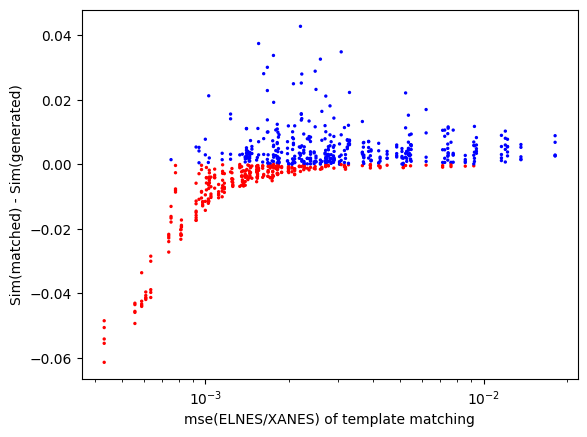

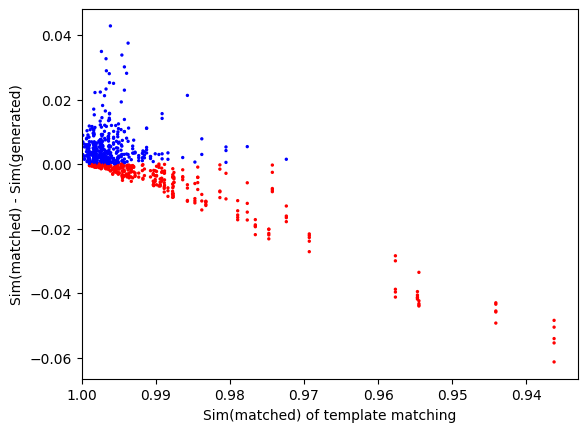

0.43333333333333335


In [194]:
import torch, os, wandb
from ase import Atoms
from dscribe.descriptors import SOAP
from template_matching import graph_to_ase_molecule
import matplotlib.pyplot as plt
import numpy as np

def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

soap = SOAP(species=["O", "Si"], r_cut=8, n_max=15, l_max=10,sigma=0.1)

project_name = 'amorphous'
run_id = '1am4buf5'
#amorphous_dir_path = ''


api = wandb.Api()
run = api.run(f'{project_name}/{run_id}')
config = run.config
generated_graph_list = torch.load(config['generated_graph_save_path'])
original_graph_list = torch.load(config['original_graph_save_path'])
dataset_path = config['dataset_path']
dataset = torch.load(dataset_path)

similarity_dict = {}
delta_for_plot = []
similarity_for_plot = []
mse_for_plot = []
for i in range(len(original_graph_list)):
    id_list = []
    mse_list = []
    reference_spectrum = original_graph_list[i].spectrum[0].cpu().numpy()
    for data in dataset:
        if data.id == original_graph_list[i].id:
            continue
        spectrum = data.spectrum[0].cpu().numpy()
        mse = np.mean((reference_spectrum - spectrum)**2)
        mse_list.append(mse)
        id_list.append(data.id)
    mse_id_list = list(zip(mse_list,id_list))
    sorted_mse_id_list = sorted(mse_id_list,key=lambda x:x[0])
    sorted_mse, sorted_id = zip(*sorted_mse_id_list)
    original_soap = soap.create(graph_to_ase_molecule(original_graph_list[i]))
    generated_soap = soap.create(graph_to_ase_molecule(generated_graph_list[i][-1]))
    for data in dataset:
        if data.id == sorted_id[0]:
            first_matched_soap = soap.create(graph_to_ase_molecule(data))
            break
    """
    second_matched_soap = soap.create(graph_to_ase_molecule(dataset[sorted_id[1]]))
    third_matched_soap = soap.create(graph_to_ase_molecule(dataset[sorted_id[2]]))
    similarity_dict[original_graph_list[i].id] = [{sorted_id[0]:[sorted_mse[0],cos_similarity(original_soap[0],first_matched_soap[0])]},
                                                   {sorted_id[1]:[sorted_mse[1],cos_similarity(original_soap[0],second_matched_soap[0])]},
                                                   {sorted_id[2]:[sorted_mse[2],cos_similarity(original_soap[0],third_matched_soap[0])]}]
    """
    delta_for_plot.append(cos_similarity(original_soap[0],first_matched_soap[0])-cos_similarity(original_soap[0],generated_soap[0]))
    similarity_for_plot.append(cos_similarity(original_soap[0],first_matched_soap[0]))
    mse_for_plot.append(sorted_mse[0])

mse_delta_list = list(zip(mse_for_plot,delta_for_plot))
sorted_mse_delta_list = sorted(mse_delta_list,key=lambda x:x[0])
sorted_mse, sorted_delta = zip(*sorted_mse_delta_list)
similarity_delta_list = list(zip(similarity_for_plot,delta_for_plot))
sorted_similarity_delta_list = sorted(similarity_delta_list,key=lambda x:x[0])
sorted_similarity, sorted_delta = zip(*sorted_similarity_delta_list)


fig, ax = plt.subplots()
colors = ['red' if value < 0 else 'blue' for value in sorted_delta]
ax.scatter(sorted_mse,sorted_delta,c=colors,s=2)
ax.set_ylabel('Sim(matched) - Sim(generated)')
ax.set_xlabel('mse(ELNES/XANES) of template matching')
ax.set_xscale('log')


fig1, ax1 = plt.subplots()
colors = ['red' if value < 0 else 'blue' for value in sorted_delta]
ax1.scatter(sorted_similarity,sorted_delta,c=colors,s=2)
ax1.set_ylabel('Sim(matched) - Sim(generated)')
ax1.set_xlabel('Sim(matched) of template matching')
ax1.invert_xaxis()
ax1.set_xlim(1)

plt.show()

print(len([value for value in sorted_delta if value < 0])/len(sorted_delta))


/tmp/ipykernel_11766/3725721607.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/4NN/dataset.pt')


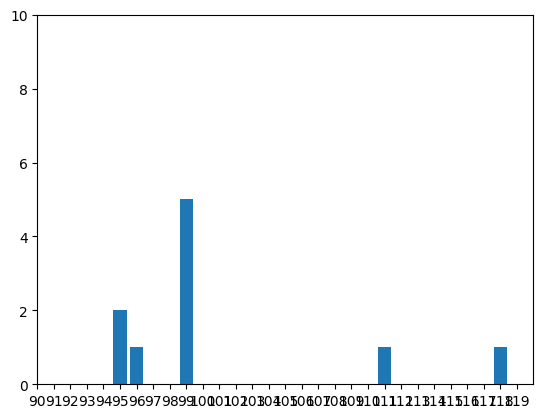

In [61]:
import os, torch
import matplotlib.pyplot as plt

dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/4NN/dataset.pt')
CN_dict = {}
for i in range(1,120):
    CN_dict[i] = 0
for data in dataset:
    num = data.x.shape[0]
    CN_dict[num] += 1
plt.bar(CN_dict.keys(),CN_dict.values())
plt.xticks(range(1,120,1))
plt.xlim(90,120)
plt.ylim(0,10)
plt.show()

In [126]:
import os, torch

path = '/home/rokubo/jbod/data/diffusion_model/dataset/template_matching'
dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset.pt')

template_2NN  = torch.load(f'{path}/5ang/best3_similarity_dict.pt')


new_2NN = {}

for key, value in template_2NN.items():
    new_2NN_list = []
    for i in range(len(template_2NN[key])):
        id_2NN_id = list(template_2NN[key][i].keys())[0]
        for data in dataset:
            if data.id == id_2NN_id:
                best_matched_spectrum = data.spectrum[0].cpu().numpy()
            elif data.id == str(key):
                reference_spectrum = data.spectrum[0].cpu().numpy()
        mse = np.mean((best_matched_spectrum-reference_spectrum)**2)
        new_2NN_list.append({id_2NN_id:[mse,template_2NN[key][i][id_2NN_id]]})
        
    new_2NN[key] = new_2NN_list

torch.save(new_2NN,'/home/rokubo/jbod/data/diffusion_model/dataset/template_matching/5ang/template_matching_result.pt')




/tmp/ipykernel_11766/1861287610.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/within_3_ang/dataset

/tmp/ipykernel_11766/3504196634.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  template_matching_result = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/tem

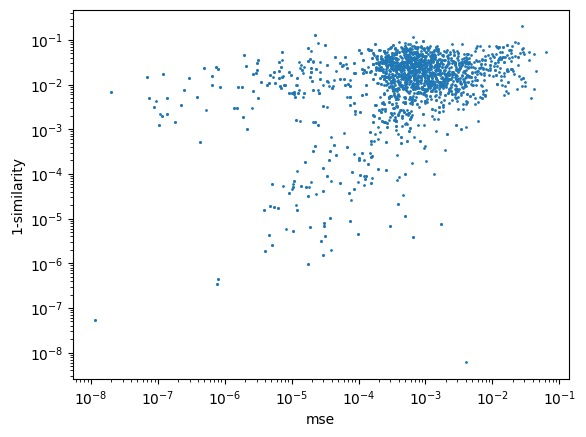

In [169]:
import os, torch
import matplotlib.pyplot as plt

template_matching_result = torch.load('/home/rokubo/jbod/data/diffusion_model/dataset/template_matching/4NN/template_matching_result.pt')
mse_list, similarity_list = [],[]

for keys, values in template_matching_result.items():
    target = values[0]
    for key, value in target.items():
        mse_list.append(value[0])
        similarity_list.append(1-value[1])
plt.plot(mse_list,similarity_list,'o',markersize=1)
plt.xlabel('mse')
plt.ylabel('1-similarity')
plt.xscale('log')
plt.yscale('log')
plt.show()


/tmp/ipykernel_11766/1805709421.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('./dataset/4NN/dataset.pt')


tensor(7.4598)


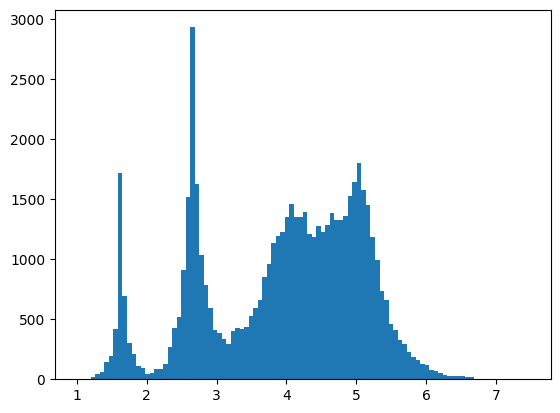

In [159]:
import os, torch
import matplotlib.pyplot as plt

dataset = torch.load('./dataset/4NN/dataset.pt')

max = 0 
norm_list = []
for data in dataset:
    for i in range(1,data.x.shape[0]):
        norm = torch.norm(data.pos[i]-data.pos[0])
        if norm > max:
            max = norm
        norm_list.append(norm.item())

print(max)

plt.hist(norm_list,bins=100)
plt.show()
